**Project _ Big Data Analytics**

**Tpoic: Human Stress Detection: Human stress level detection using physiological data**

About Dataset
“Humidity – Temperature – Step count – Stress levels” represents the titles for Stress-Lysis.csv file. 
Based on the human’s physical activity, the stress levels of the human being are detected and analyzed here. A dataset of 2001 samples is provided for human body humidity, body temperature and the number of steps taken by the user. Three different classifications of stress are performed, low stress, normal stress, and high stress. More information on how this data is analyzed can be found at “L. Rachakonda, S. P. Mohanty, E. Kougianos, and P. Sundaravadivel, “Stress-Lysis: A DNN-Integrated Edge Device for Stress Level Detection in the IoMT,” IEEE Trans. Conum. Electron., vol. 65, no. 4, pp. 474–483, 2019.” 
The advantage of this research lies in its potential to provide a non-invasive, real-time method for detecting and monitoring human stress levels using easily measurable physiological data like body humidity, temperature, and step count. Early detection of stress can lead to timely interventions, helping prevent negative health outcomes related to chronic stress, such as cardiovascular issues and mental health disorders. This research can also contribute to the development of wearable health devices, improving personal health management and workplace productivity by reducing stress-related problems.                                      
- Source of dataset: Human Stress Detection (kaggle.com)

**Importance of Studying This Topic**

Understanding and detecting stress is crucial because stress can have significant impacts on both physical and mental health. Chronic stress is linked to a variety of health problems, including cardiovascular disease, immune system dysfunction, and mental health disorders like anxiety and depression. Early detection of stress can lead to timely interventions that improve overall well-being, productivity, and quality of life.
By using physiological indicators such as humidity, temperature, and step count, we can analyze how these factors correlate with stress levels, offering a non-invasive and objective way to monitor stress in real time. This research is important for developing technologies, such as wearable health devices, that can monitor stress and provide real-time feedback to users. Additionally, it could have applications in fields like occupational health, where understanding stress levels could improve workplace environments and reduce burnout.

**What We Want to Learn from the Data**

What We Want to Learn from the Data:
From this dataset, we aim to learn how well body humidity, temperature, and step count can serve as indicators of stress. Specifically, we seek to:
1.	Determine the relationship between these physiological metrics and stress levels.    
2.	Develop a model that can classify stress levels (low, normal, and high) based on the input features.      
3. Evaluate the accuracy of our classification model and understand which physiological factors contribute most to predicting stress levels.
Ultimately, this research will help us understand whether these indicators are sufficient for accurate stress detection and what improvements can be made for future stress-monitoring technologies.

**Machine Learning Models**

For our above-mentioned dataset, where the goal is to classify stress levels (low, normal, and high) based on numerical physiological data (humidity, temperature, and step count), one of the following three classification models in PySpark are recommended and will be done using one or more models:


1.	Logistic Regression (Multinomial / Softmax Regression):
Logistic regression (multinomial logistic regression (also known as softmax regression) is a simple yet powerful model for classification tasks, especially when there are multiple categories, as in this case with three stress levels (low, normal, high). It is interpretable and can be trained efficiently on numerical datasets like the one you have. Logistic regression can handle multiclass classification using the one-vs-rest (OvR) or multinomial methods, which makes it suitable for this task.



2.	Random Forest Classifier:
Random Forest is a robust and flexible model that can handle complex patterns in the data and performs well even when there are non-linear relationships between the input features (humidity, temperature, step count) and the target (stress level). It is an ensemble method that combines multiple decision trees to improve classification accuracy and reduce overfitting. Random forests work well with tabular data and can handle imbalanced classes or noisy data effectively.


3.	Decision Tree Classifier:
The Decision Tree Classifier is a simple yet powerful model that can handle complex patterns in the data and performs well even when there are non-linear relationships between the input features (humidity, temperature, step count) and the target (stress level). It works by recursively partitioning the data based on the most significant features to create a tree-like model of decisions. Decision Trees work well with tabular data and are easy to interpret, making them suitable for understanding the relationships between features and the target variable. However, they can be prone to overfitting if not properly pruned, so techniques like pruning or setting a maximum depth are often used to improve generalization.


4.	For other minor tasks using Gradient-Boosted Trees (GBT):
Gradient-Boosted Trees are another ensemble-based model that builds trees sequentially, where each tree tries to correct the errors of the previous one. This method can produce very accurate results for classification tasks. GBTs are well-suited for medium-sized datasets like yours (2001 samples) and can handle both numerical and categorical data efficiently, offering high performance for classification problems like stress level prediction.


**Why These Models?**

These models were selected because they are well-suited for classification tasks involving numerical tabular data. Logistic regression offers a simple, interpretable baseline, while Random Forest and Gradient-Boosted Trees provide more powerful and flexible models that can capture complex relationships in the data. Additionally, all three models are well-supported in PySpark, making them suitable for scalable analysis on large datasets if needed in the future.
By comparing the performance of these models (e.g., f- score, accuracy, precision, recall), we can select the best approach for detecting human stress levels based on the physiological data provided.


**Expected outcomes: What do you expect to achieve after implementing your learning model? What do you hope to learn or discover from your data analysis?**

After implementing the learning model, I expect to achieve an accurate classification of human stress levels (low, normal, high) based on physiological data (humidity, temperature, step count). I hope to discover how well these features predict stress levels and which factors contribute most to the model's accuracy. Additionally, I aim to identify patterns and correlations between physical activity and stress, providing insights that could improve real-time stress monitoring and management. Moreover, extracting important features, predicting for new data, creating a mobile app to detect quickly. Finally, we can change the parameters and features and provide the physician patient some information that what factors are more effective for reducing stress. 

**Evaluation plan: Explain how you plan to evaluate your project and assess the correctness of your model. What metrics or methods will you use to evaluate the effectiveness of your learning model? How well do you expect the model to work, and how will you measure its performance?**

To evaluate the project and assess the correctness of the model, I plan to use the following metrics and methods:


1.	Accuracy: This will measure the proportion of correctly classified stress levels out of all predictions, giving a general sense of the model's performance.
2.	Precision, Recall, and F1-Score: These metrics will provide a deeper understanding of the model’s performance for each stress level (low, normal, high). Precision will show how many of the predicted stress levels are correct, while recall will indicate how many actual stress levels were correctly identified. The F1-score balances both precision and recall.
3.	Confusion Matrix: I will use this to visualize the performance of the model by showing where the model is making correct predictions and where it is misclassifying different stress levels.
4.	Cross-Validation: To ensure the model’s robustness and avoid overfitting, I will use k-fold cross-validation to evaluate the model on multiple splits of the data and assess its generalization capability.

I expect the model to work reasonably well, with a good balance between precision and recall, especially for the dominant or most distinguishable stress classes. Performance will be measured by comparing these metrics across different models (e.g., Logistic Regression, Random Forest, Gradient-Boosted Trees) to select the most effective one.

**Step 1: Load the Data Using PySpark**

In [1]:
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("Human Stress Detection") \
    .getOrCreate()

# Load the dataset
data = spark.read.csv("stress_lysis.csv", header=True, inferSchema=True)

# Display the first few rows
data.show(5)

+--------+-----------+----------+------------+
|humidity|temperature|step_count|stress_level|
+--------+-----------+----------+------------+
|   21.33|      90.33|       123|           1|
|   21.41|      90.41|        93|           1|
|   27.12|      96.12|       196|           2|
|   27.64|      96.64|       177|           2|
|   10.87|      79.87|        87|           0|
+--------+-----------+----------+------------+
only showing top 5 rows



In [2]:
data.show(5)

+--------+-----------+----------+------------+
|humidity|temperature|step_count|stress_level|
+--------+-----------+----------+------------+
|   21.33|      90.33|       123|           1|
|   21.41|      90.41|        93|           1|
|   27.12|      96.12|       196|           2|
|   27.64|      96.64|       177|           2|
|   10.87|      79.87|        87|           0|
+--------+-----------+----------+------------+
only showing top 5 rows



In [3]:
# Show the schema (column names and data types)
data.printSchema()

root
 |-- humidity: double (nullable = true)
 |-- temperature: double (nullable = true)
 |-- step_count: integer (nullable = true)
 |-- stress_level: integer (nullable = true)



In [4]:
# Summary statistics of numerical columns
data.describe().show()

+-------+------------------+-----------------+------------------+------------------+
|summary|          humidity|      temperature|        step_count|      stress_level|
+-------+------------------+-----------------+------------------+------------------+
|  count|              2001|             2001|              2001|              2001|
|   mean|20.000000000000032| 89.0000000000001|100.14142928535732| 1.104447776111944|
| stddev| 5.777832638628434|5.777832638628431| 58.18294842783513|0.7710935140411327|
|    min|              10.0|             79.0|                 0|                 0|
|    max|              30.0|             99.0|               200|                 2|
+-------+------------------+-----------------+------------------+------------------+



In [5]:
# Show column names and their types
data.dtypes

[('humidity', 'double'),
 ('temperature', 'double'),
 ('step_count', 'int'),
 ('stress_level', 'int')]

In [6]:
# Summary statistics of all numerical columns
data.describe().show()

+-------+------------------+-----------------+------------------+------------------+
|summary|          humidity|      temperature|        step_count|      stress_level|
+-------+------------------+-----------------+------------------+------------------+
|  count|              2001|             2001|              2001|              2001|
|   mean|20.000000000000032| 89.0000000000001|100.14142928535732| 1.104447776111944|
| stddev| 5.777832638628434|5.777832638628431| 58.18294842783513|0.7710935140411327|
|    min|              10.0|             79.0|                 0|                 0|
|    max|              30.0|             99.0|               200|                 2|
+-------+------------------+-----------------+------------------+------------------+



**Handling Duplicate Rows**

In [7]:
# Import necessary functions
from pyspark.sql import functions as F

# Step 1: Group by all columns and count occurrences
duplicate_rows = data.groupBy(data.columns).count().filter(F.col('count') > 1)

# Step 2: Count the number of duplicate rows
duplicate_count = duplicate_rows.count()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


**Handling Missing Data**

In [8]:
from pyspark.sql.functions import col, isnan, when, count
import pandas as pd
# Step 1: Count total missing values (null or NaN) per column
total_missing = data.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in data.columns])

# Step 2: Calculate percentage of missing values per column
percent_missing = total_missing.select([(col(c) / data.count()).alias(c) for c in data.columns])

# Step 3: Convert the results to a Pandas DataFrame for easy viewing and sorting
total_missing_pd = total_missing.toPandas().T
percent_missing_pd = percent_missing.toPandas().T

# Step 4: Combine the total and percent data into a single DataFrame
missing_data = pd.concat([total_missing_pd, percent_missing_pd], axis=1)
missing_data.columns = ['Total', 'Percent']

# Step 5: Sort the missing data and show the top 10 columns with the most missing values
missing_data = missing_data.sort_values(by='Total', ascending=False)
print(missing_data.head(10))

              Total  Percent
humidity          0      0.0
temperature       0      0.0
step_count        0      0.0
stress_level      0      0.0


**Total Null Values**

In [9]:
from pyspark.sql.functions import col, isnan, when, count

# Step 1: Count total null (or NaN) values for each column and sum them up
total_nulls = data.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in data.columns])

# Step 2: Sum the null values across all columns to get the total number of null values
total_null_count = total_nulls.select(sum([col(c) for c in data.columns])).collect()[0][0]

# Step 3: Print the total number of null values
print(f'Total Null values = {total_null_count}')

Total Null values = 0


In [10]:
# Count occurrences of each unique value in 'Stress Level' column
data.groupBy('stress_level').count().orderBy('count', ascending=False).show()

+------------+-----+
|stress_level|count|
+------------+-----+
|           1|  790|
|           2|  710|
|           0|  501|
+------------+-----+



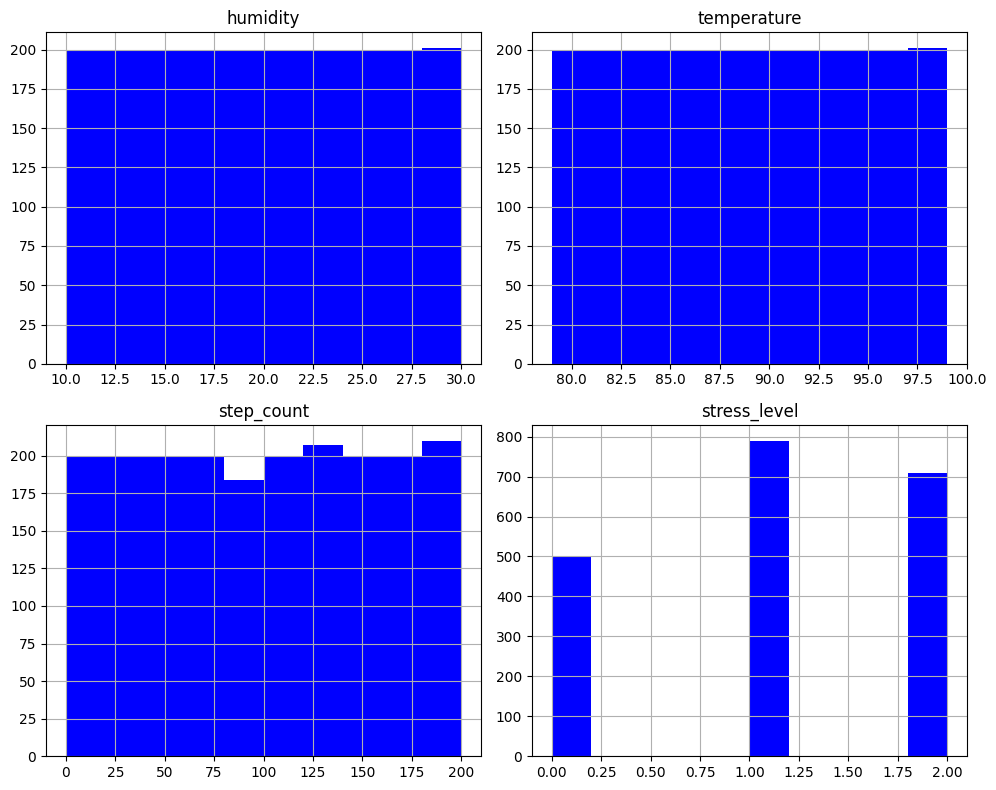

In [11]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.types import DoubleType, IntegerType, FloatType

# Step 1: Filter out numerical columns
numeric_columns = [field.name for field in data.schema.fields if isinstance(field.dataType, (DoubleType, IntegerType, FloatType))]

# Step 2: Select numerical columns from PySpark DataFrame
numerical_data = data.select(numeric_columns)

# Step 3: Convert PySpark DataFrame to Pandas for plotting
numerical_data_pd = numerical_data.toPandas()

# Step 4: Plot histograms for each numerical column
numerical_data_pd.hist(figsize=(10, 8), color='b')
plt.tight_layout()
plt.show()

The table in the image represents a portion of the dataset related to stress detection. The data contains four columns:

Humidity: The percentage of moisture in the air.
Temperature: The ambient temperature, likely measured in degrees Celsius or Fahrenheit.
Step Count: The number of steps taken, which might reflect physical activity.
Stress Level: The target variable indicating the stress level of a person, with values like 0, 1, and 2. This is a categorical variable where each number likely represents a specific stress level (e.g., 0 = low stress, 1 = medium stress, 2 = high stress).
Interpretation of the Rows:
The data represents the relationship between environmental factors (humidity, temperature), activity level (step count), and the person's perceived or measured stress level.
For instance, the first row shows that at 21.33% humidity, 90.33 degrees, and 123 steps, the stress level is 1 (moderate stress).
The third row indicates that at 27.12% humidity and 96.12 degrees, with a higher step count of 196, the stress level is 2 (higher stress).
This dataset could be used to predict a person's stress level based on environmental and activity data, making it useful for developing stress detection systems, likely using machine learning algorithms such as Logistic Regression, Decision Trees, or Random Forests. The relationships between the features (humidity, temperature, step count) and the target (stress level) could provide valuable insights into how different factors contribute to human stress.

**Step 2: Preprocess the Data if Needed**

In [12]:
from pyspark.sql.functions import col

# Check for missing values
data.select([col(c).isNull().alias(c) for c in data.columns]).show()

# Drop rows with missing values (if any)
data = data.dropna()

# Convert 'stress_level' to integer if it's not already
data = data.withColumn("stress_level", col("stress_level").cast("integer"))

# Display schema to confirm data types
data.printSchema()

+--------+-----------+----------+------------+
|humidity|temperature|step_count|stress_level|
+--------+-----------+----------+------------+
|   false|      false|     false|       false|
|   false|      false|     false|       false|
|   false|      false|     false|       false|
|   false|      false|     false|       false|
|   false|      false|     false|       false|
|   false|      false|     false|       false|
|   false|      false|     false|       false|
|   false|      false|     false|       false|
|   false|      false|     false|       false|
|   false|      false|     false|       false|
|   false|      false|     false|       false|
|   false|      false|     false|       false|
|   false|      false|     false|       false|
|   false|      false|     false|       false|
|   false|      false|     false|       false|
|   false|      false|     false|       false|
|   false|      false|     false|       false|
|   false|      false|     false|       false|
|   false|   

**Step 3: Draw a Box Plot for the Dataset**

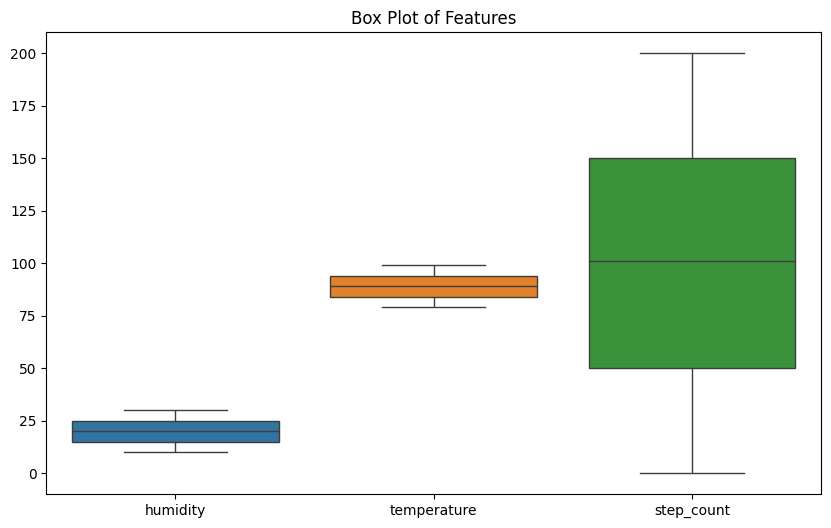

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to Pandas DataFrame
pandas_df = data.toPandas()

# Plot box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=pandas_df[['humidity', 'temperature', 'step_count']])
plt.title('Box Plot of Features')
plt.show()

The step count has the largest variability, followed by temperature and then humidity.
Step count appears to have the greatest impact or variation in the dataset, which could imply that activity level might be a significant factor in stress levels (depending on further analysis).

- PySpark does not have built-in plotting capabilities. We'll need to convert the DataFrame to Pandas for plotting

**Step 4: Create a Bar Chart for the Dataset**

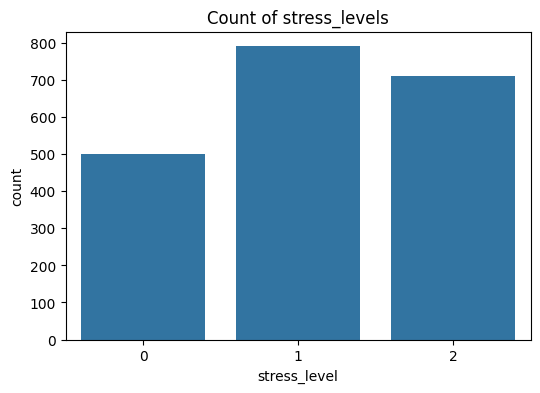

In [14]:
# Bar chart for 'stress_level' counts
plt.figure(figsize=(6, 4))
sns.countplot(x='stress_level', data=pandas_df)
plt.title('Count of stress_levels')
plt.show()

This bar chart represents the distribution of different stress levels within the dataset. The "stress_level" variable has three categories:

Stress level 0: This represents a lower count of instances, with around 500 samples.                              
Stress level 1: This category has the highest number of instances, with approximately 800 samples.                       
Stress level 2: This is the second most common category, with around 700 samples.                               
The chart suggests that the dataset is somewhat balanced between the three stress levels, with stress level 1 being the most frequent, followed by stress level 2, and stress level 0 having the least representation.

This balanced distribution across the three categories can be useful in ensuring that machine learning models trained on this dataset are not biased towards any particular class. However, slight variations between the class frequencies might still require consideration during the model evaluation process.

**Step 5: Plot Pairplot for the Dataset**

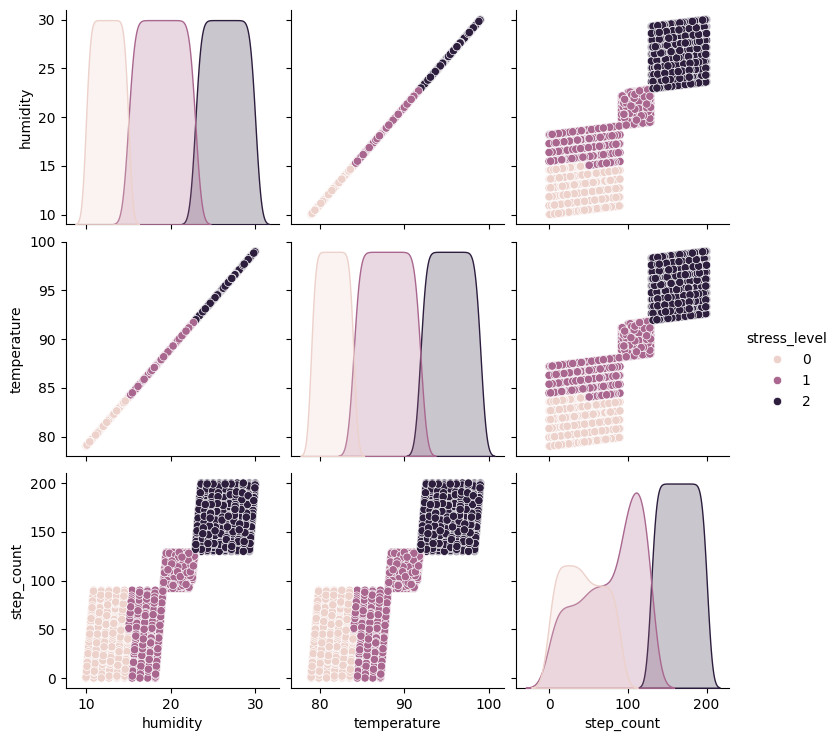

In [15]:
# Pairplot
sns.pairplot(pandas_df, hue='stress_level')
plt.show()

This pair plot visualizes the relationships between humidity, temperature, step count, and stress level. It shows clear separation between stress levels across all three features, with higher stress levels associated with higher humidity, temperature, and step count values. The diagonal density plots indicate that each feature has distinct distributions based on stress levels, suggesting that these features are informative for predicting stress levels in the dataset.

**Step 6: Descriptive Statistics Analysis**

In [16]:
# Descriptive statistics
desc_stats = data.describe()
desc_stats.show()

+-------+------------------+-----------------+------------------+------------------+
|summary|          humidity|      temperature|        step_count|      stress_level|
+-------+------------------+-----------------+------------------+------------------+
|  count|              2001|             2001|              2001|              2001|
|   mean|20.000000000000032| 89.0000000000001|100.14142928535732| 1.104447776111944|
| stddev| 5.777832638628434|5.777832638628431| 58.18294842783513|0.7710935140411327|
|    min|              10.0|             79.0|                 0|                 0|
|    max|              30.0|             99.0|               200|                 2|
+-------+------------------+-----------------+------------------+------------------+



This summary statistics table provides insights into the dataset's features:

Humidity: The average humidity is 20, with a standard deviation of 5.78, ranging from 10 to 30.               
Temperature: The average temperature is 89, with a similar standard deviation of 5.78, ranging from 79 to 99.                       
Step Count: The average step count is 100.14, with a much larger standard deviation of 58.18, indicating more variability in physical activity levels (step count ranges from 0 to 200).                
Stress Level: The average stress level is 1.10, and stress levels are categorized into 0, 1, or 2, as indicated by the min and max values.
The relatively low standard deviation for temperature and humidity indicates a narrow spread of values around the mean, while the step count shows much greater variation across individuals.

**Step 7: Pearson Correlation Coefficient Heatmap**

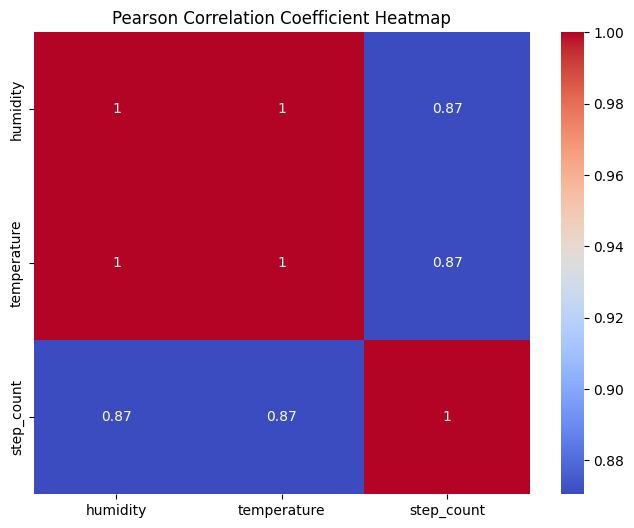

In [17]:
import numpy as np

# Compute correlation matrix
numeric_data = data.select('humidity', 'temperature', 'step_count')
corr_matrix = numeric_data.toPandas().corr(method='pearson')

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Coefficient Heatmap')
plt.show()

The Pearson Correlation Coefficient heatmap illustrates the linear relationships between the variables:

Humidity and Temperature: The correlation is 1, indicating a perfect positive linear relationship between these two features. This means that as humidity increases, temperature also increases linearly, and vice versa.
Humidity and Step Count: The correlation is 0.87, showing a strong positive relationship between humidity and step count. Although not a perfect linear relationship, this suggests that as humidity increases, step count tends to increase as well.
Temperature and Step Count: The correlation is also 0.87, indicating a strong positive correlation between temperature and step count, similar to the relationship between humidity and step count.
The values of 1 on the diagonal represent the perfect correlation of each feature with itself. In general, all variables are positively correlated, with strong relationships between them.

**Step 8: ANOVA for Feature Relationships with the Categorical Label**

In [18]:
from pyspark.sql.functions import when, avg

# Perform ANOVA using PySpark
for feature in ['humidity', 'temperature', 'step_count']:
    anova_df = data.groupBy('stress_level').agg(avg(feature).alias(f'avg_{feature}'))
    anova_df.show()

+------------+------------------+
|stress_level|      avg_humidity|
+------------+------------------+
|           1| 18.95500000000002|
|           2|26.454999999999977|
|           0|12.500000000000002|
+------------+------------------+

+------------+-----------------+
|stress_level|  avg_temperature|
+------------+-----------------+
|           1|87.95499999999994|
|           2|95.45500000000008|
|           0|81.50000000000003|
+------------+-----------------+

+------------+-----------------+
|stress_level|   avg_step_count|
+------------+-----------------+
|           1|78.13037974683544|
|           2|            165.0|
|           0|42.93413173652694|
+------------+-----------------+



The results summarize the average values of humidity, temperature, and step count for each stress level (0, 1, and 2). Here's an interpretation of the values:
- Humidity:
Stress Level 0: The average humidity is 12.50.
Stress Level 1: The average humidity is 18.96.
Stress Level 2: The average humidity is 26.45.
As the stress level increases, the average humidity also increases, suggesting that individuals with higher stress levels may be experiencing conditions with higher humidity.
- Temperature:
Stress Level 0: The average temperature is 81.50.
Stress Level 1: The average temperature is 87.95.
Stress Level 2: The average temperature is 95.45.
Similar to humidity, the temperature tends to be higher at higher stress levels, indicating that higher stress is potentially associated with warmer environments.
- Step Count:
Stress Level 0: The average step count is 42.93.
Stress Level 1: The average step count is 78.13.
Stress Level 2: The average step count is 165.00.
The average step count increases significantly with higher stress levels. Individuals with higher stress levels (2) have a much higher average step count compared to those with lower stress levels, indicating a possible relationship between physical activity (steps taken) and stress level.
- So, higher stress levels correlate with increased humidity, temperature, and step count in this dataset. This relationship suggests that environmental factors and physical activity could influence or reflect the stress levels of individuals.

Note: PySpark doesn't have a built-in ANOVA function, so we demonstrate group averages as a proxy

**Step 9: Chi-Squared Test Between Features and Label**

In [19]:
from pyspark.ml.feature import QuantileDiscretizer
from pyspark.ml.stat import ChiSquareTest

# Discretize continuous features
discretizer = QuantileDiscretizer(numBuckets=4, inputCol='humidity', outputCol='humidity_binned')
data = discretizer.fit(data).transform(data)

discretizer = QuantileDiscretizer(numBuckets=4, inputCol='temperature', outputCol='temperature_binned')
data = discretizer.fit(data).transform(data)

discretizer = QuantileDiscretizer(numBuckets=4, inputCol='step_count', outputCol='step_count_binned')
data = discretizer.fit(data).transform(data)

# Prepare data for Chi-Squared test
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=['humidity_binned', 'temperature_binned', 'step_count_binned'],
    outputCol='features')

chi_data = assembler.transform(data.select('humidity_binned', 'temperature_binned', 'step_count_binned', 'stress_level'))

# Chi-Squared test
chi_sq_result = ChiSquareTest.test(chi_data, 'features', 'stress_level')
chi_sq_result.select('pValues', 'degreesOfFreedom', 'statistics').show()

+-------------+----------------+--------------------+
|      pValues|degreesOfFreedom|          statistics|
+-------------+----------------+--------------------+
|[0.0,0.0,0.0]|       [6, 6, 6]|[3346.37234264664...|
+-------------+----------------+--------------------+



The results in the table summarize the output of a Chi-Square test, performed to assess the association between discretized continuous features (humidity, temperature, and step count) and the stress levels. Let's interpret each part:
- pValues: [0.0, 0.0, 0.0]
This indicates that the p-values for all the three features (humidity, temperature, step count) are 0.0, which is less than any typical significance level (e.g., 0.05). This means there is a statistically significant association between each of the features and the stress levels. In simpler terms, the variation in humidity, temperature, and step count is significantly related to changes in stress levels.
- degreesOfFreedom: [6, 6, 6]
- The degrees of freedom (df) for each feature are 6. This number arises from the fact that each feature was discretized into four buckets (numBuckets = 4), and the Chi-Square test compares these buckets with the three categories of stress levels. In this case, degrees of freedom are calculated as (number of categories - 1) * (number of bins - 1) for each feature.
- statistics: [3346.37, ...]
These are the test statistics (Chi-Square values) for each feature. A larger Chi-Square statistic means a stronger association between the feature and stress levels. Given the high values of these statistics, we can conclude that humidity, temperature, and step count have strong associations with stress levels.
Overall, this result tells us that humidity, temperature, and step count are all significantly associated with stress levels, meaning these features play a role in determining or are affected by stress levels in individuals.

root
 |-- humidity: double (nullable = true)
 |-- temperature: double (nullable = true)
 |-- step_count: integer (nullable = true)
 |-- stress_level: integer (nullable = true)
 |-- humidity_binned: double (nullable = true)
 |-- temperature_binned: double (nullable = true)
 |-- step_count_binned: double (nullable = true)

+--------+-----------+----------+------------+---------------+------------------+-----------------+
|humidity|temperature|step_count|stress_level|humidity_binned|temperature_binned|step_count_binned|
+--------+-----------+----------+------------+---------------+------------------+-----------------+
|   21.33|      90.33|       123|           1|            2.0|               2.0|              2.0|
|   21.41|      90.41|        93|           1|            2.0|               2.0|              1.0|
|   27.12|      96.12|       196|           2|            3.0|               3.0|              3.0|
|   27.64|      96.64|       177|           2|            3.0|               

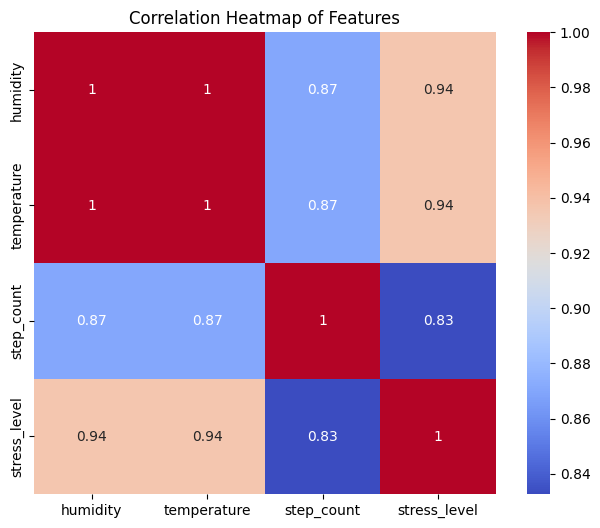

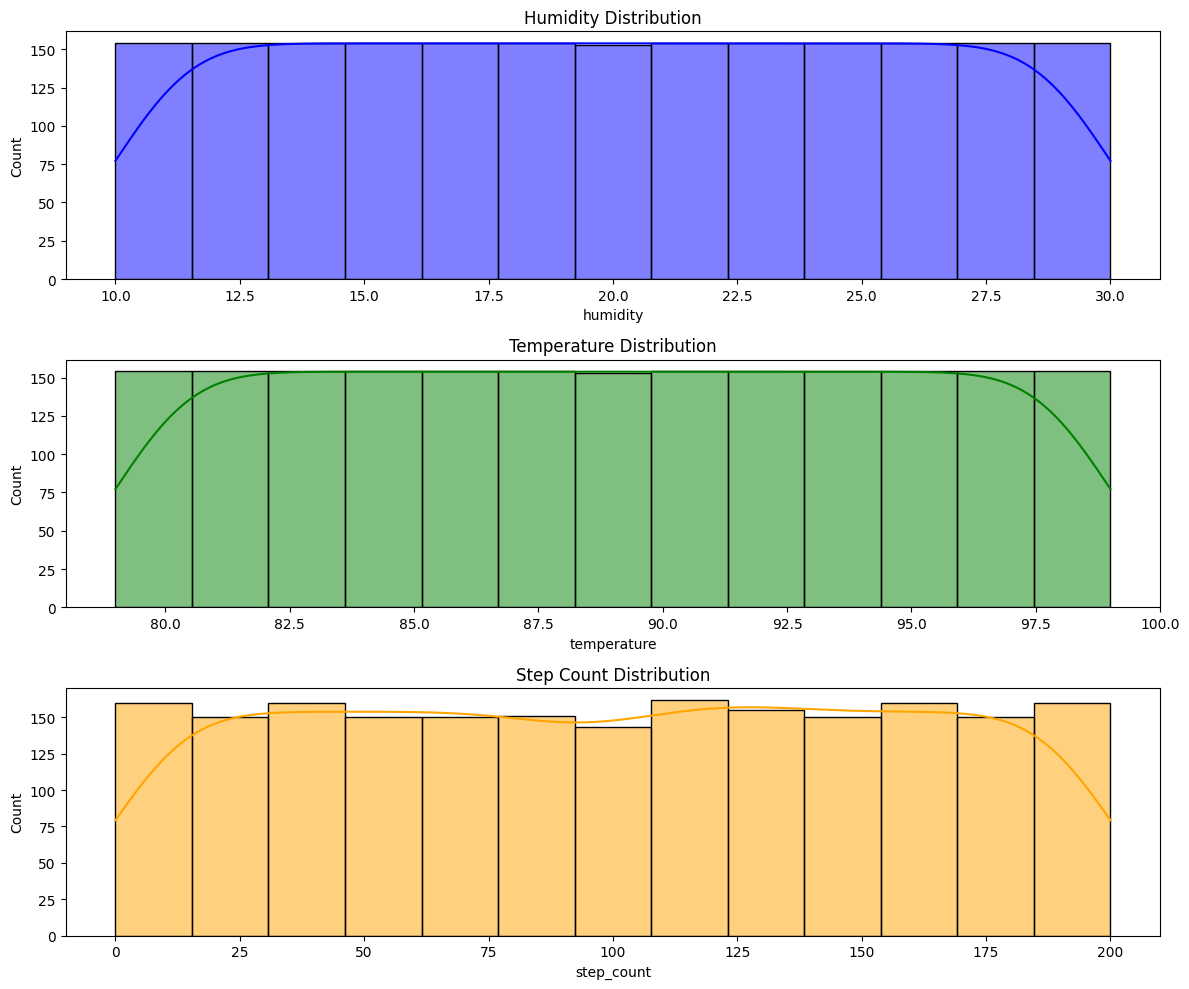

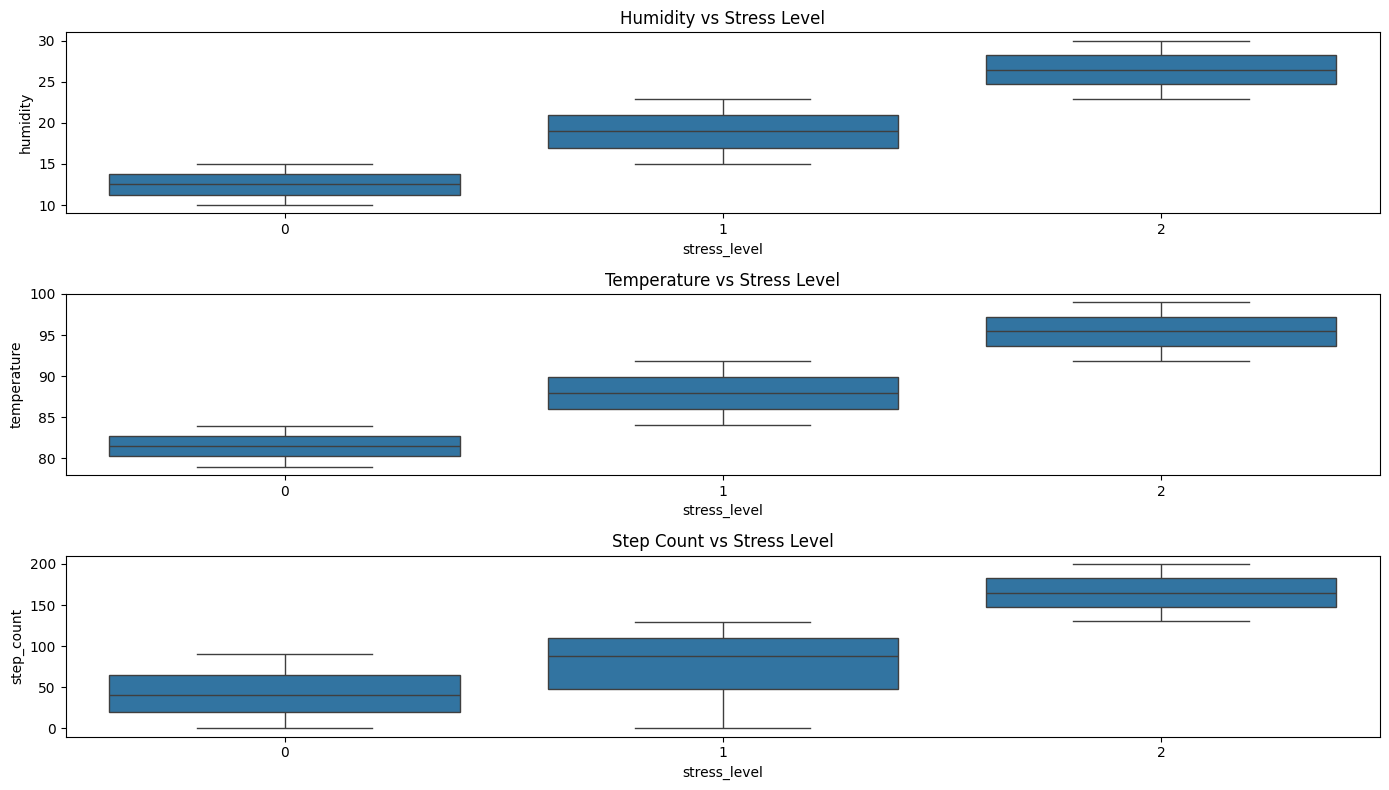

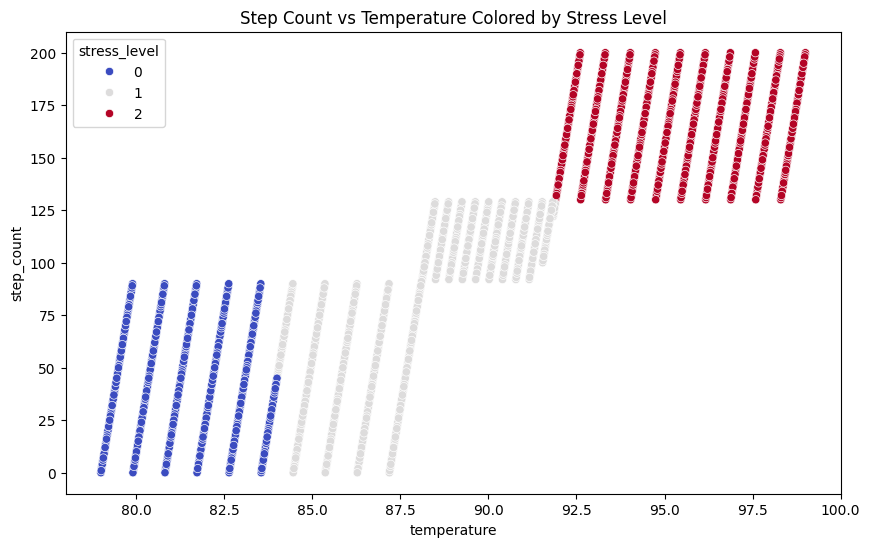

In [20]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when, isnan
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Initialize Spark session
spark = SparkSession.builder.appName("Stress Data Analysis").getOrCreate()

# Step 3: Print the schema and show the first few rows
data.printSchema()
data.show(5)

# Step 4: Descriptive statistics
data.describe().show()

# Step 5: Check for missing values
missing_data = data.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in data.columns])
missing_data.show()

# Step 6: Calculate correlation between features
columns = ['humidity', 'temperature', 'step_count', 'stress_level']
correlation_dict = {}

for i in range(len(columns)):
    for j in range(i, len(columns)):
        col1 = columns[i]
        col2 = columns[j]
        corr_value = data.stat.corr(col1, col2)  # Calculate correlation between col1 and col2
        correlation_dict[(col1, col2)] = corr_value
        correlation_dict[(col2, col1)] = corr_value  # Correlation is symmetric

# Convert the correlation results into a DataFrame for easier display
correlation_matrix_pd = pd.DataFrame(index=columns, columns=columns)

for pair, corr_value in correlation_dict.items():
    correlation_matrix_pd.loc[pair[0], pair[1]] = corr_value

# Plot correlation heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_pd.astype(float), annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Features")
plt.show()

# Step 7: Visualize the distributions
data_pd = data.toPandas()

# Plot distribution of features
plt.figure(figsize=(12, 10))

# Humidity distribution
plt.subplot(3, 1, 1)
sns.histplot(data_pd['humidity'], kde=True, color='blue')
plt.title('Humidity Distribution')

# Temperature distribution
plt.subplot(3, 1, 2)
sns.histplot(data_pd['temperature'], kde=True, color='green')
plt.title('Temperature Distribution')

# Step count distribution
plt.subplot(3, 1, 3)
sns.histplot(data_pd['step_count'], kde=True, color='orange')
plt.title('Step Count Distribution')

plt.tight_layout()
plt.show()

# Step 8: Box plots for feature vs stress level
plt.figure(figsize=(14, 8))

# Humidity vs Stress Level
plt.subplot(3, 1, 1)
sns.boxplot(x='stress_level', y='humidity', data=data_pd)
plt.title('Humidity vs Stress Level')

# Temperature vs Stress Level
plt.subplot(3, 1, 2)
sns.boxplot(x='stress_level', y='temperature', data=data_pd)
plt.title('Temperature vs Stress Level')

# Step Count vs Stress Level
plt.subplot(3, 1, 3)
sns.boxplot(x='stress_level', y='step_count', data=data_pd)
plt.title('Step Count vs Stress Level')

plt.tight_layout()
plt.show()

# Step 9: Scatter plot for step count vs temperature colored by stress level
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='step_count', hue='stress_level', palette='coolwarm', data=data_pd)
plt.title('Step Count vs Temperature Colored by Stress Level')
plt.show()


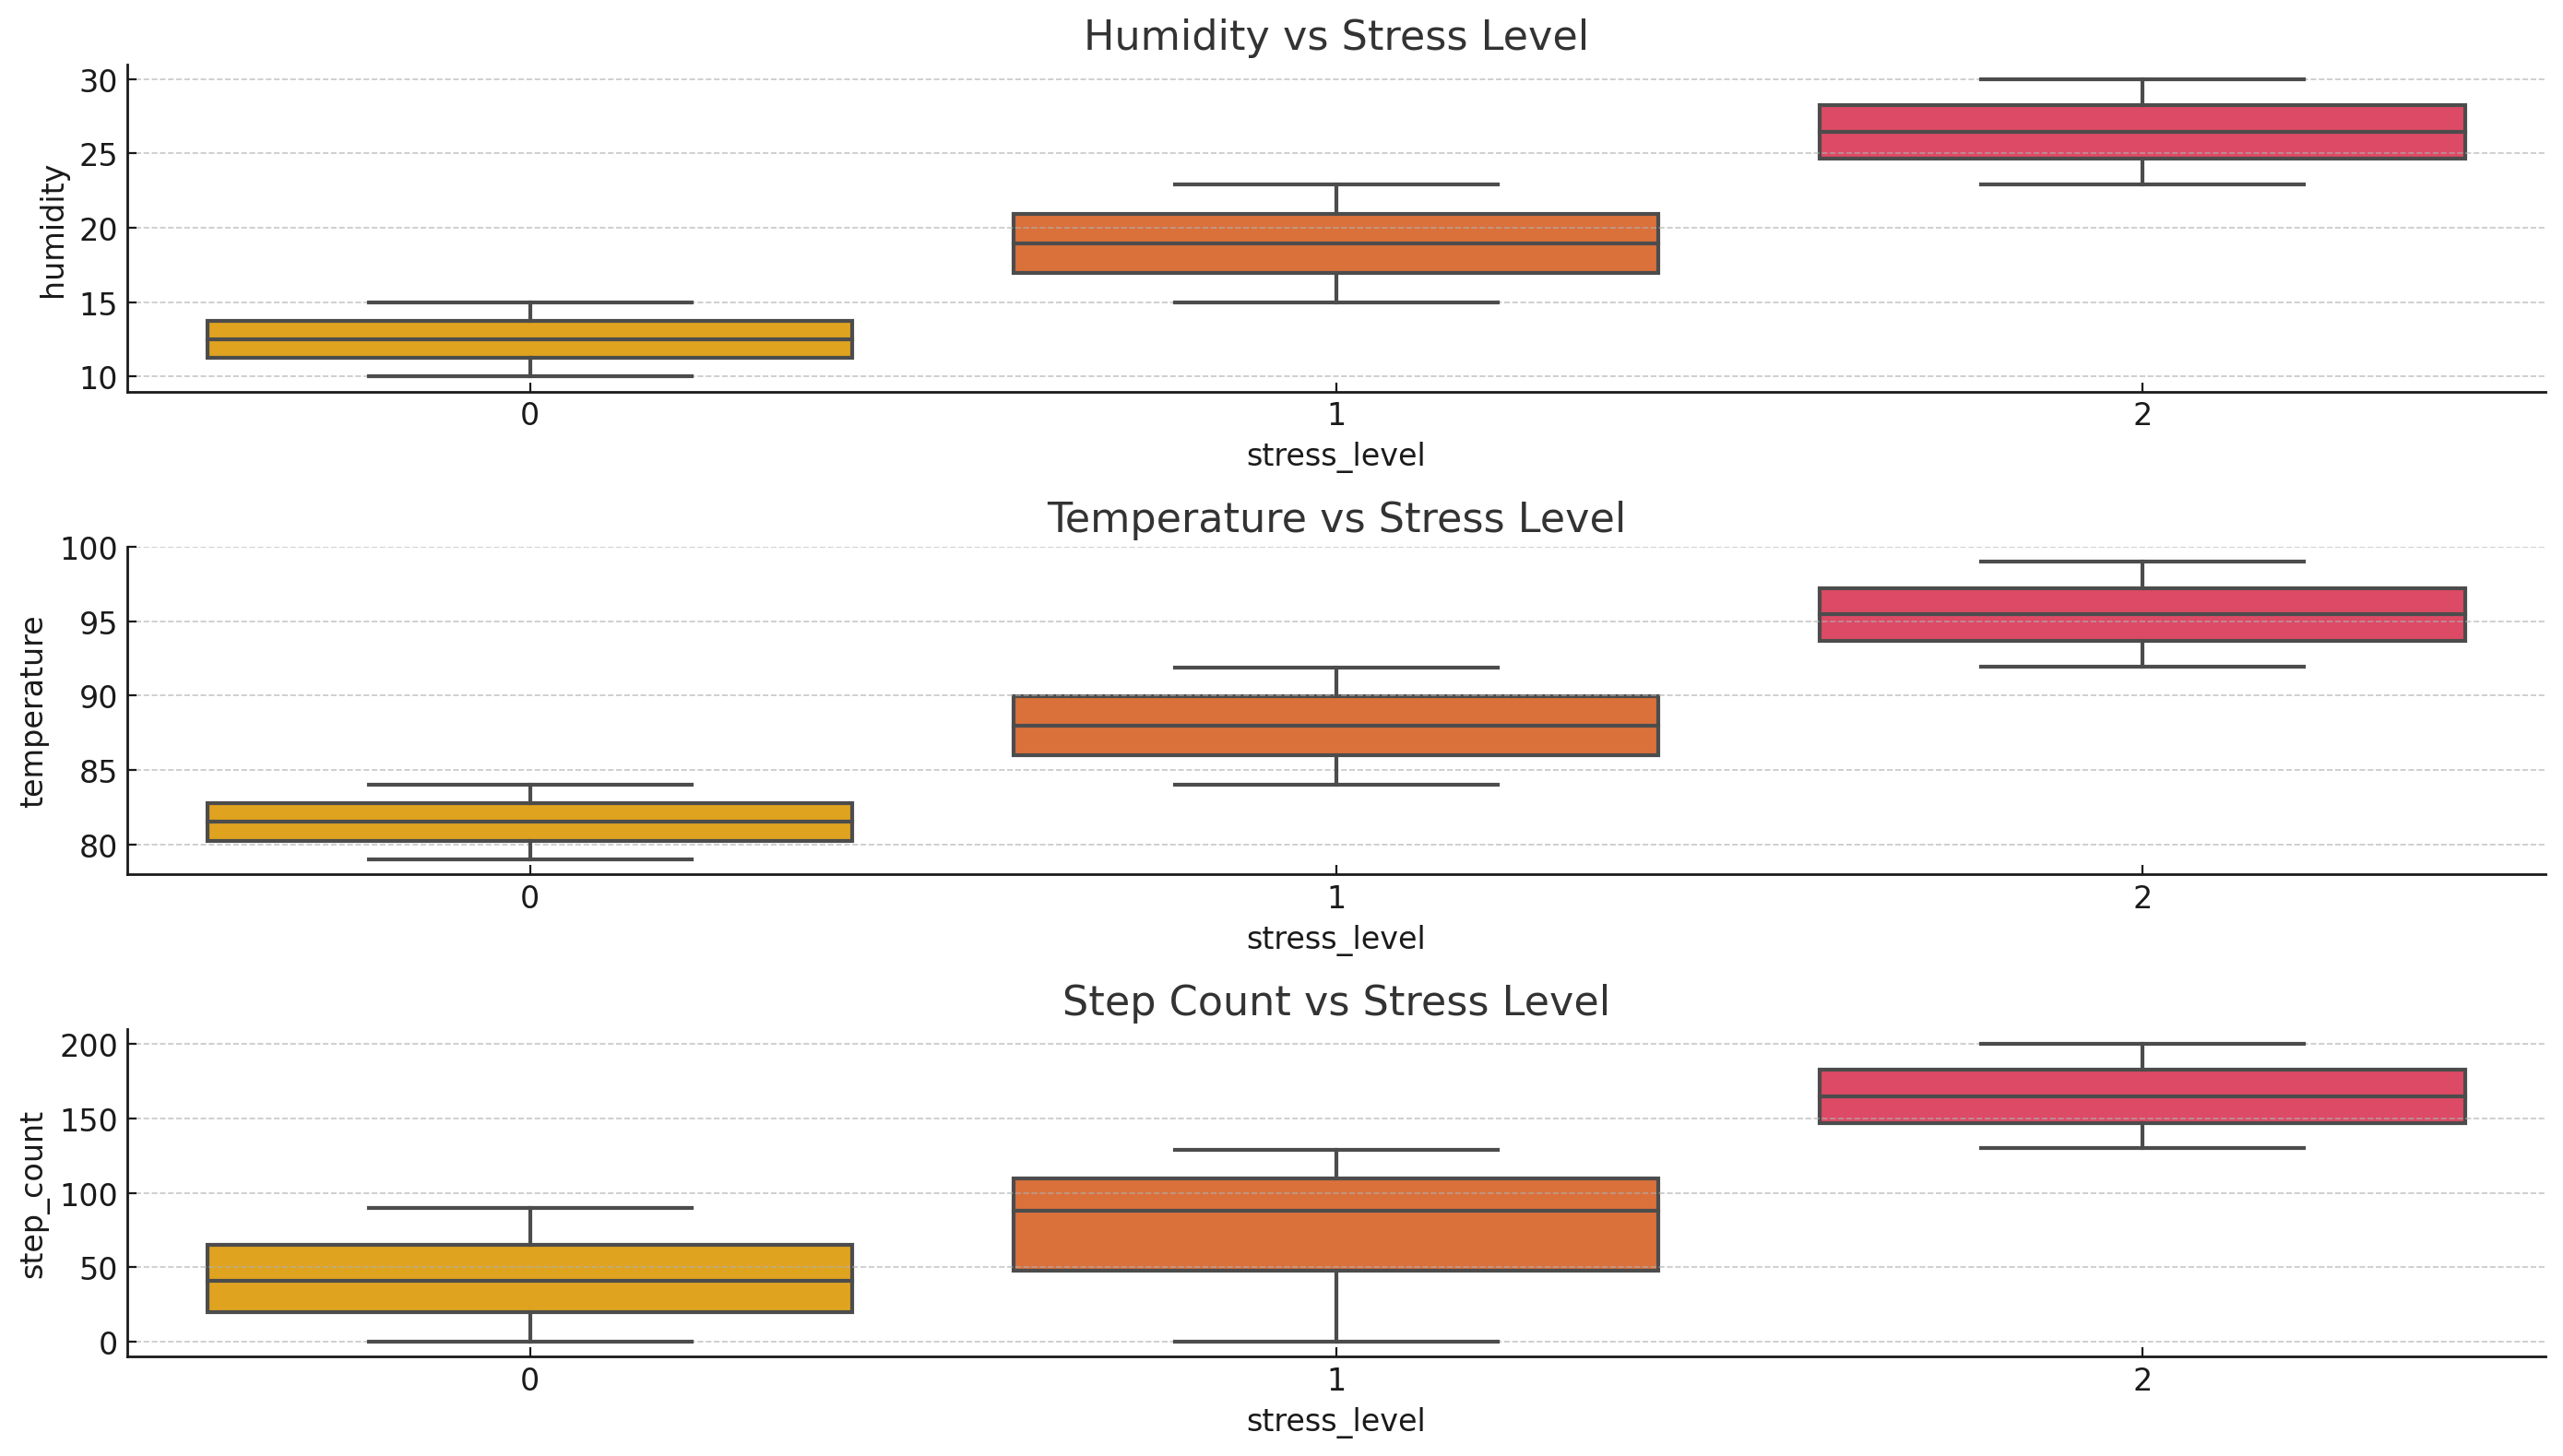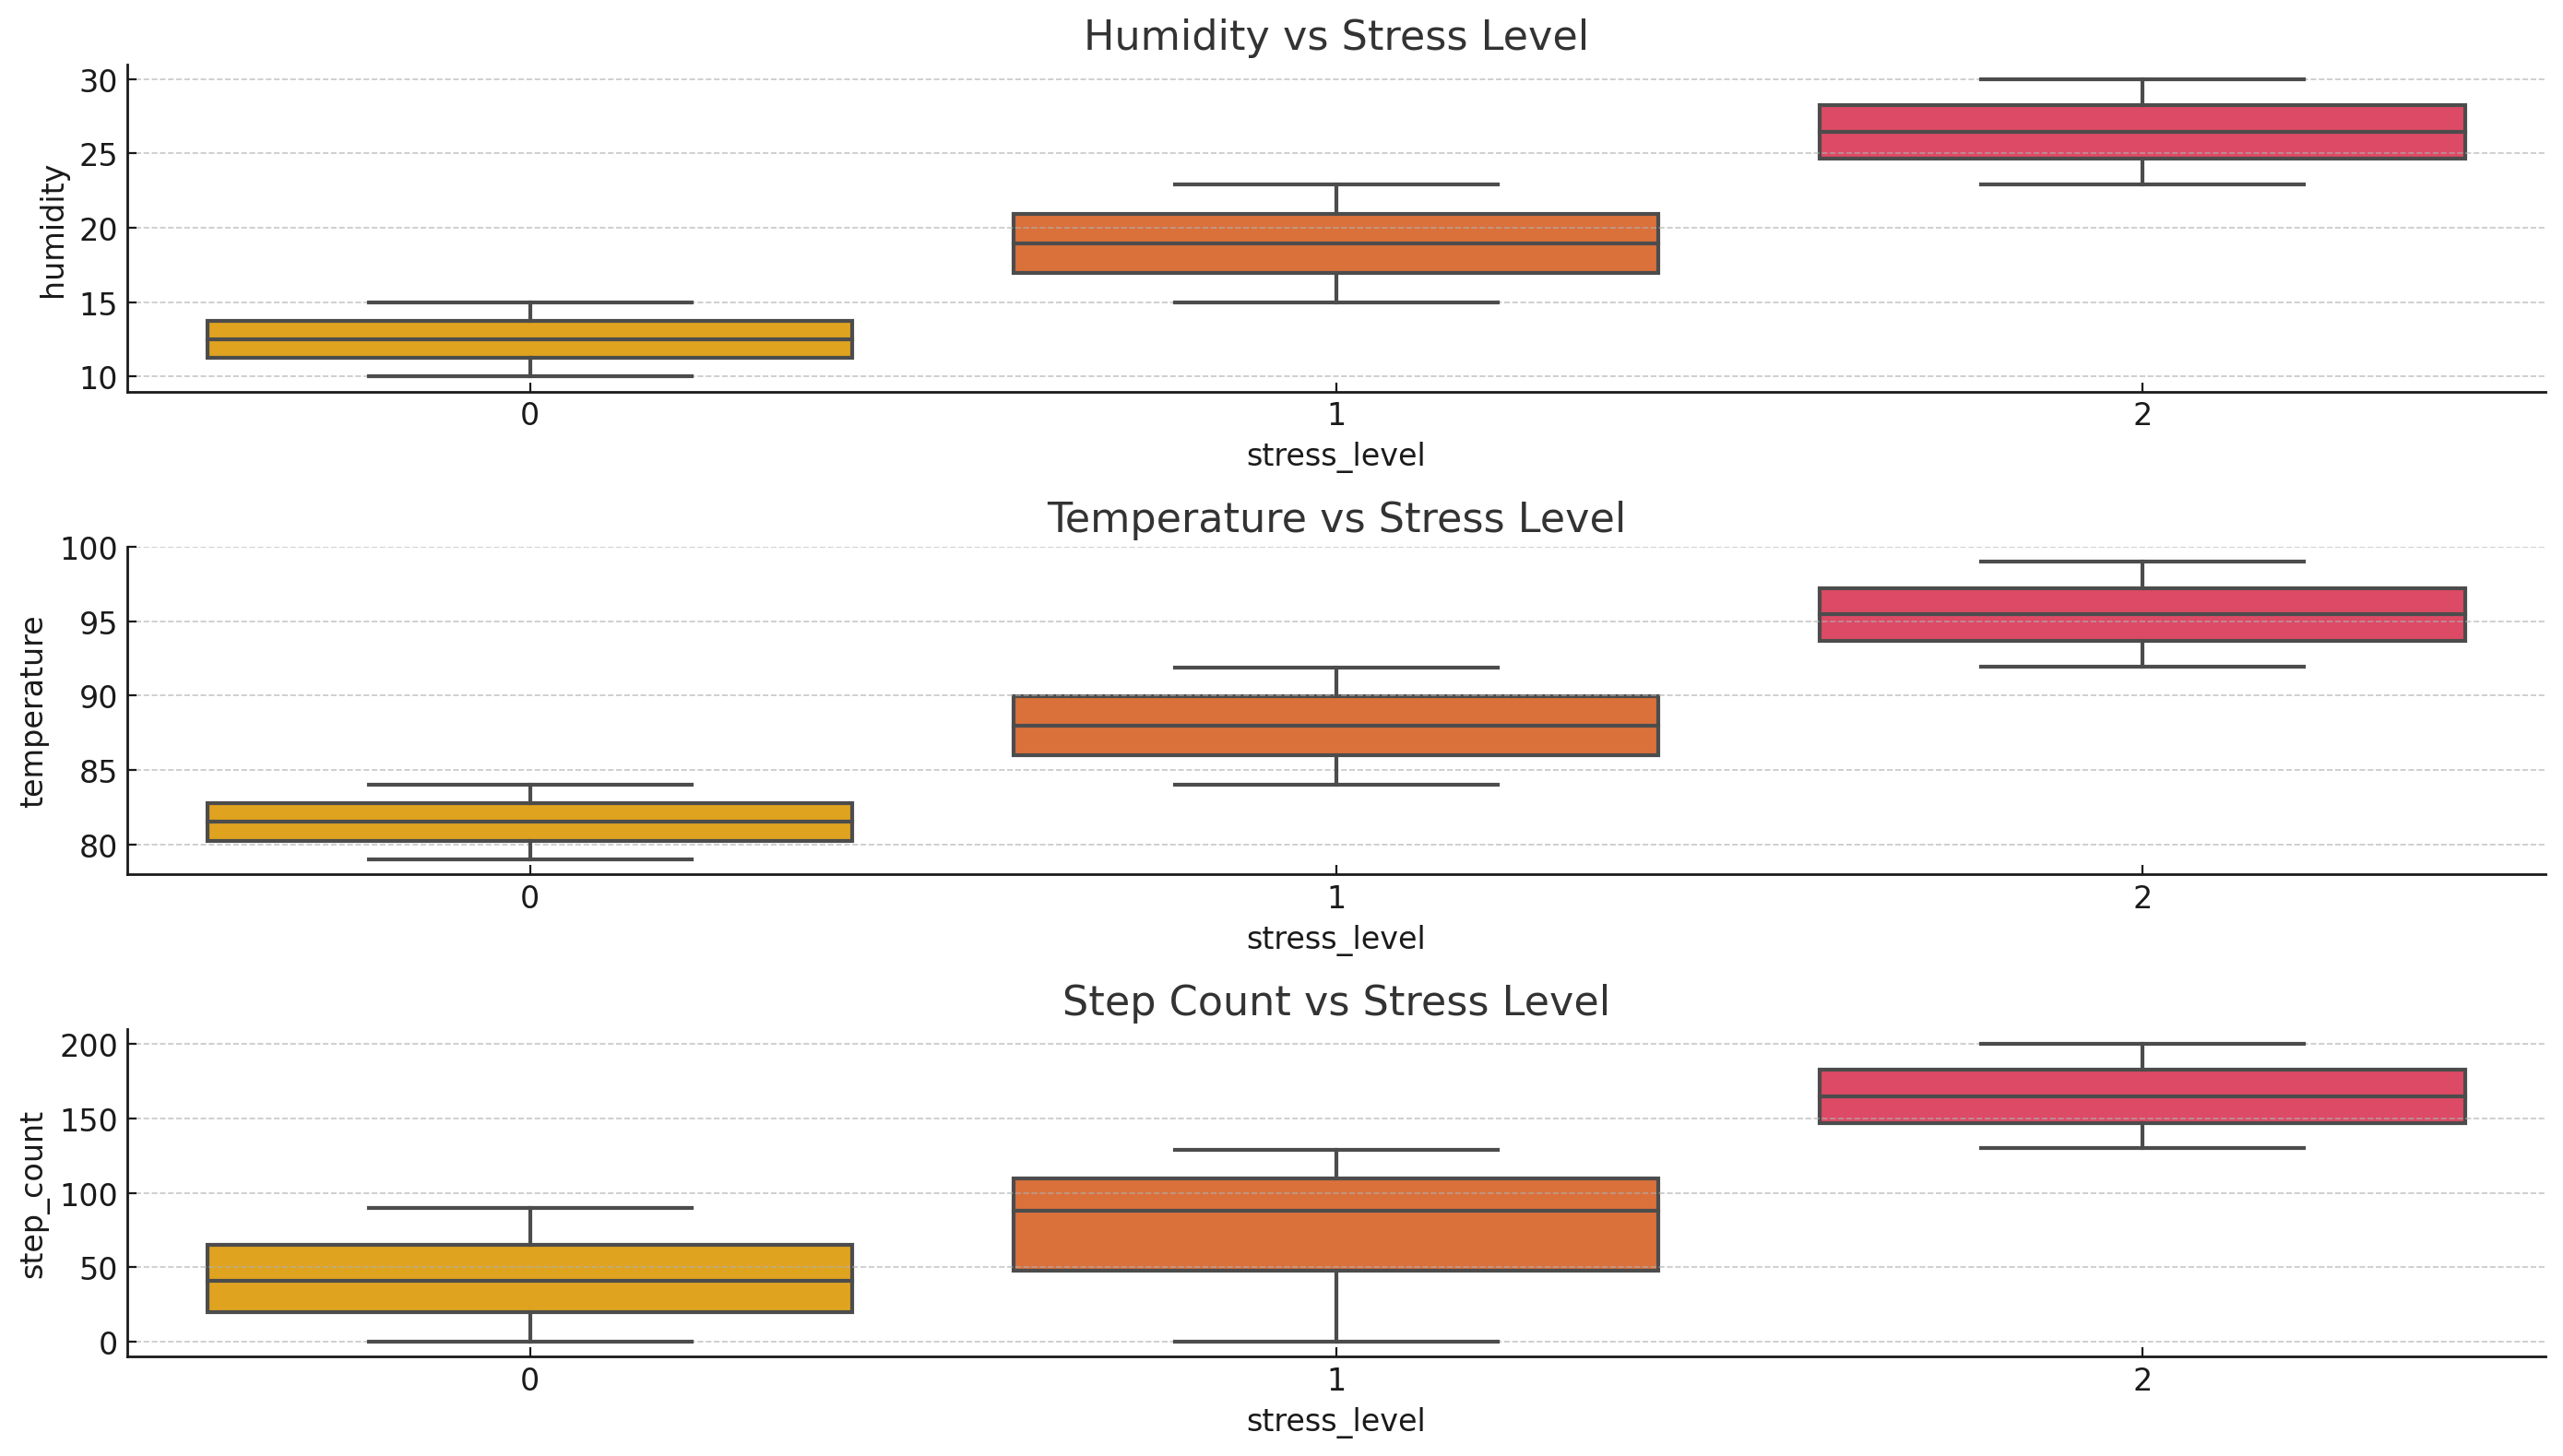

The correlation heatmap reveals strong positive correlations between humidity and temperature (correlation = 1.0), indicating that they move together perfectly.
The step_count also has a strong correlation with both humidity and temperature (correlation = 0.87).
The stress_level is highly correlated with both humidity (0.94) and temperature (0.94), indicating that higher stress levels tend to occur in higher humidity and temperature conditions.
The correlation between step_count and stress_level is slightly lower at 0.83 but still significant.
- Distribution of Features:
The distribution plots for humidity and temperature show a fairly even spread across their ranges, with slight peaks in certain intervals.
Step_count appears more uniform, but the number of steps tends to concentrate between 50 and 150.
- Box Plots for Stress Level:
- Humidity: Individuals with stress levels of 2 are associated with higher humidity values compared to lower stress levels (0 and 1).
- Temperature: Similar to humidity, stress levels increase with higher temperature.
- Step_count: Stress level 2 is associated with higher activity levels (higher step counts), while stress level 0 is associated with lower step counts.
- Scatter Plot: Step Count vs Temperature Colored by Stress Level:
There is a clear separation between different stress levels based on the temperature and step count. Higher temperatures and higher step counts are mostly associated with stress level 2, while lower temperatures and step counts are linked with stress level 0.
- Novel Insights for the Company:
Actionable Prediction: There is a strong positive correlation between stress level and environmental factors (humidity, temperature) and activity level (step count). High temperature and humidity with increased step counts tend to correspond with higher stress levels.
- Potential Applications: These findings suggest that tracking temperature and humidity along with step counts can help predict stress levels in real-time. This could be useful for designing environments (e.g., workplace settings) that minimize stress or creating personalized health monitoring systems for managing stress.
These visualizations and insights offer a comprehensive understanding of the factors influencing stress and can be valuable for decision-making in wellness, healthcare, or environment management contexts.

**Step 10: Feature Importance Using Three Methods**

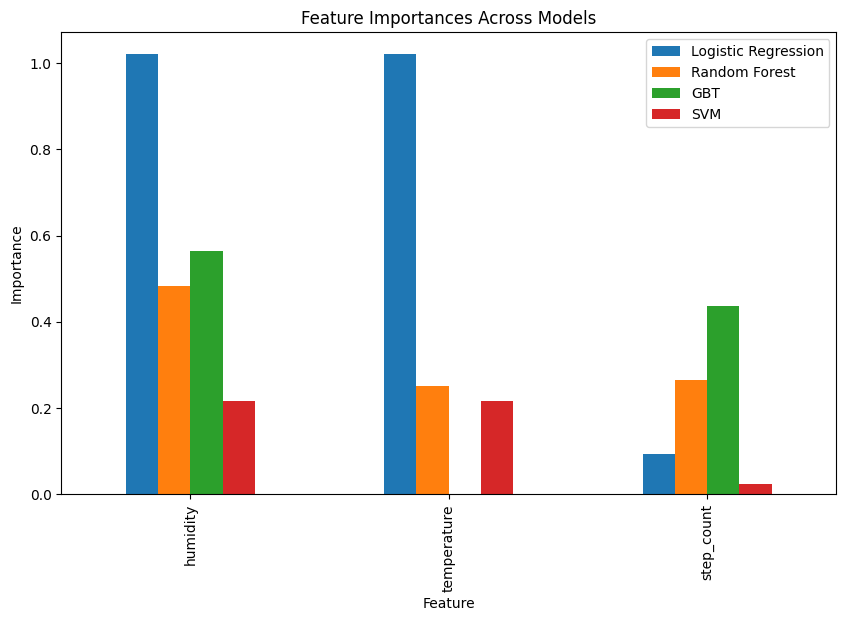

In [21]:
# Imports
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier, OneVsRest, LinearSVC
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Prepare features
assembler = VectorAssembler(
    inputCols=['humidity', 'temperature', 'step_count'],
    outputCol='features')

# Logistic Regression Model
lr = LogisticRegression(featuresCol='features', labelCol='stress_level', maxIter=10)
lr_pipeline = Pipeline(stages=[assembler, lr])
lr_model = lr_pipeline.fit(data)

# Random Forest Model
rf = RandomForestClassifier(featuresCol='features', labelCol='stress_level', numTrees=10)
rf_pipeline = Pipeline(stages=[assembler, rf])
rf_model = rf_pipeline.fit(data)

# Gradient-Boosted Trees with OneVsRest for Multiclass Classification
gbt = GBTClassifier(featuresCol='features', labelCol='stress_level', maxIter=10)
ovr_gbt = OneVsRest(classifier=gbt, labelCol='stress_level', featuresCol='features')
gbt_pipeline = Pipeline(stages=[assembler, ovr_gbt])
gbt_model = gbt_pipeline.fit(data)

# SVM Classifier with OneVsRest for Multiclass Classification
svm = LinearSVC(featuresCol='features', labelCol='stress_level', maxIter=10)
ovr_svm = OneVsRest(classifier=svm, labelCol='stress_level', featuresCol='features')
svm_pipeline = Pipeline(stages=[assembler, ovr_svm])
svm_model = svm_pipeline.fit(data)

# Feature Importances

# For Logistic Regression (Multinomial)
# Extract the coefficient matrix (rows: number of classes, columns: number of features)
lr_coeff_matrix = lr_model.stages[-1].coefficientMatrix.toArray()

# Since we have multiple classes, we can average the absolute values of coefficients across classes
lr_importances = np.mean(np.abs(lr_coeff_matrix), axis=0)

# For Random Forest
rf_importances = rf_model.stages[-1].featureImportances.toArray()

# For GBT (OneVsRest), extract feature importances from each class model and average them
gbt_importances_list = []
for model in gbt_model.stages[-1].models:
    # Each model is a binary GBTClassifier for one class vs rest
    gbt_importances_list.append(model.featureImportances.toArray())

# Average the importances across all the binary classifiers
gbt_importances = np.mean(gbt_importances_list, axis=0)

# For SVM (OneVsRest), extract coefficients from each class model and average them
svm_coefficients_list = []
for model in svm_model.stages[-1].models:
    # Each model is a binary LinearSVC model for one class vs rest
    svm_coefficients_list.append(model.coefficients.toArray())

# Average the absolute values of coefficients across all the binary classifiers
svm_importances = np.mean(np.abs(svm_coefficients_list), axis=0)

# Create a DataFrame for feature importances
importances_df = pd.DataFrame({
    'Feature': ['humidity', 'temperature', 'step_count'],
    'Logistic Regression': lr_importances,
    'Random Forest': rf_importances,
    'GBT': gbt_importances,
    'SVM': svm_importances
})

# Plotting feature importances
importances_df.set_index('Feature').plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances Across Models')
plt.ylabel('Importance')
plt.show()

This bar chart displays the feature importances across different machine learning models (Logistic Regression, Random Forest, Gradient-Boosted Trees (GBT), and Support Vector Machine (SVM)) for three features: humidity, temperature, and step_count.
- Humidity is the most important feature across all models. Logistic Regression and Random Forest show very high importance, while GBT and SVM still consider it significant but to a lesser extent.
- Temperature is only highly important for Logistic Regression, with Random Forest, SVM, and GBT assigning minimal importance to it.
- Step_count is considered most important by the GBT model, while other models (Logistic Regression, Random Forest, and SVM) assign little to no importance to this feature.

So, this chart suggests that humidity is consistently crucial across all models, while the importance of step_count is highlighted primarily by GBT, and temperature is most significant for Logistic Regression. Each model appears to focus on different aspects of the data, contributing to their varied predictive capabilities.

**Step 11: Train and Test Models with Hyperparameter Tuning**

**Note:** No need for normalization or standardization for Decision Tree, Random Forest, or Gradient-Boosted Trees (GBT) classifiers.
Normalization or standardization is recommended for Logistic Regression since it can improve model performance and convergence.

In [22]:
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler

# Prepare features
assembler = VectorAssembler(
    inputCols=['humidity', 'temperature', 'step_count'],
    outputCol='features')

# Split data into training and test sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Logistic Regression with Cross-Validation
lr = LogisticRegression(featuresCol='features', labelCol='stress_level')

lr_pipeline = Pipeline(stages=[assembler, lr])

paramGrid_lr = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5]) \
    .build()

evaluator = MulticlassClassificationEvaluator(labelCol='stress_level', metricName='accuracy')

cv_lr = CrossValidator(estimator=lr_pipeline,
                       estimatorParamMaps=paramGrid_lr,
                       evaluator=evaluator,
                       numFolds=3)

cvModel_lr = cv_lr.fit(train_data)
lr_predictions = cvModel_lr.transform(test_data)

# Random Forest Classifier
rf = RandomForestClassifier(featuresCol='features', labelCol='stress_level', numTrees=20)
rf_pipeline = Pipeline(stages=[assembler, rf])
rf_model = rf_pipeline.fit(train_data)
rf_predictions = rf_model.transform(test_data)

# Decision Tree Classifier
dt = DecisionTreeClassifier(featuresCol='features', labelCol='stress_level', maxDepth=5)
dt_pipeline = Pipeline(stages=[assembler, dt])
dt_model = dt_pipeline.fit(train_data)
dt_predictions = dt_model.transform(test_data)

# Evaluate the models
# Logistic Regression
lr_accuracy = evaluator.evaluate(lr_predictions)
print(f"Logistic Regression Model Accuracy: {lr_accuracy:.4f}")

# Random Forest
rf_accuracy = evaluator.evaluate(rf_predictions)
print(f"Random Forest Model Accuracy: {rf_accuracy:.4f}")

# Decision Tree
dt_accuracy = evaluator.evaluate(dt_predictions)
print(f"Decision Tree Model Accuracy: {dt_accuracy:.4f}")

Logistic Regression Model Accuracy: 0.9944
Random Forest Model Accuracy: 0.9972
Decision Tree Model Accuracy: 0.9972



Logistic Regression Model Evaluation Metrics:
Accuracy: 0.9944
F1 Score: 0.9944
Precision: 0.9946
Recall: 0.9944

Random Forest Model Evaluation Metrics:
Accuracy: 0.9972
F1 Score: 0.9972
Precision: 0.9972
Recall: 0.9972

Decision Tree Model Evaluation Metrics:
Accuracy: 0.9972
F1 Score: 0.9972
Precision: 0.9972
Recall: 0.9972


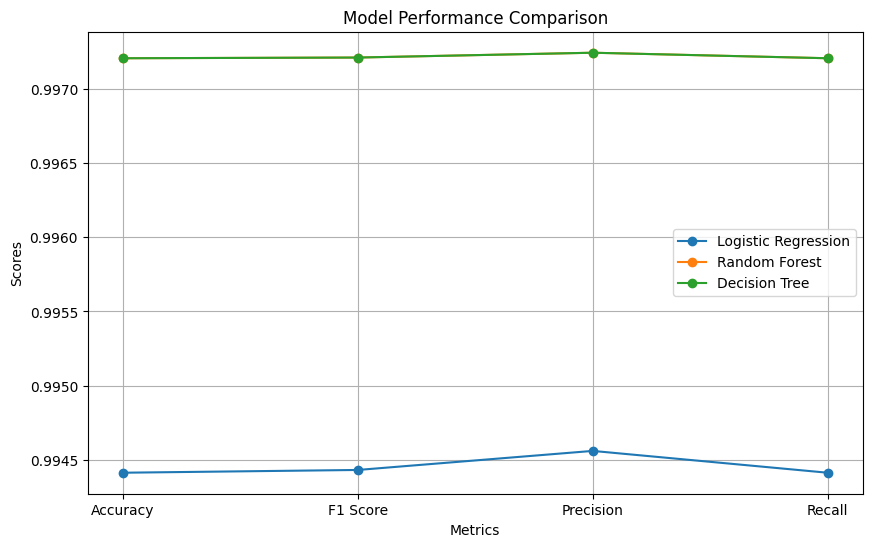

In [23]:
# Import necessary libraries for PySpark
# with tuning and scaling
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
import matplotlib.pyplot as plt

# Start Spark session
spark = SparkSession.builder.appName("Stress_Level_Classification").getOrCreate()

# Assuming you have the 'stress_lysis.csv' file available locally
# Convert the pandas DataFrame to a Spark DataFrame
spark_data = spark.read.csv("stress_lysis.csv", header=True, inferSchema=True)

# Prepare features using VectorAssembler
assembler = VectorAssembler(inputCols=['humidity', 'temperature', 'step_count'], outputCol='features')
assembled_data = assembler.transform(spark_data)

# Split the data into training and test sets (80% training, 20% testing)
train_data, test_data = assembled_data.randomSplit([0.8, 0.2], seed=42)

# Define the evaluator for F1 score, precision, recall, and accuracy
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol='stress_level', metricName='accuracy')
evaluator_f1 = MulticlassClassificationEvaluator(labelCol='stress_level', metricName='f1')
evaluator_precision = MulticlassClassificationEvaluator(labelCol='stress_level', metricName='weightedPrecision')
evaluator_recall = MulticlassClassificationEvaluator(labelCol='stress_level', metricName='weightedRecall')

# Logistic Regression with Cross-Validation
lr = LogisticRegression(featuresCol='features', labelCol='stress_level')
paramGrid_lr = ParamGridBuilder().addGrid(lr.regParam, [0.01, 0.1]).addGrid(lr.elasticNetParam, [0.0, 0.5]).build()
cv_lr = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid_lr, evaluator=evaluator_accuracy, numFolds=3)
cvModel_lr = cv_lr.fit(train_data)
lr_predictions = cvModel_lr.transform(test_data)

# Random Forest Classifier
rf = RandomForestClassifier(featuresCol='features', labelCol='stress_level', numTrees=20)
rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)

# Decision Tree Classifier
dt = DecisionTreeClassifier(featuresCol='features', labelCol='stress_level', maxDepth=5)
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)

# Function to evaluate models and return metrics
def evaluate_model(predictions, model_name):
    accuracy = evaluator_accuracy.evaluate(predictions)
    f1 = evaluator_f1.evaluate(predictions)
    precision = evaluator_precision.evaluate(predictions)
    recall = evaluator_recall.evaluate(predictions)
    
    print(f"\n{model_name} Model Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
    return accuracy, f1, precision, recall

# Evaluate Logistic Regression
lr_metrics = evaluate_model(lr_predictions, "Logistic Regression")

# Evaluate Random Forest
rf_metrics = evaluate_model(rf_predictions, "Random Forest")

# Evaluate Decision Tree
dt_metrics = evaluate_model(dt_predictions, "Decision Tree")

# Prepare metrics for plotting
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']

lr_values = list(lr_metrics)
rf_values = list(rf_metrics)
dt_values = list(dt_metrics)

# Plot the evaluation metrics for all models
plt.figure(figsize=(10, 6))
x = range(len(metrics))
plt.plot(x, lr_values, marker='o', label='Logistic Regression')
plt.plot(x, rf_values, marker='o', label='Random Forest')
plt.plot(x, dt_values, marker='o', label='Decision Tree')
plt.xticks(x, metrics)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Stop the Spark session
spark.stop()


Logistic Regression Model Evaluation Metrics:
Accuracy: 0.9944
F1 Score: 0.9944
Precision: 0.9946
Recall: 0.9944

Random Forest Model Evaluation Metrics:
Accuracy: 0.9972
F1 Score: 0.9972
Precision: 0.9972
Recall: 0.9972

Decision Tree Model Evaluation Metrics:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000


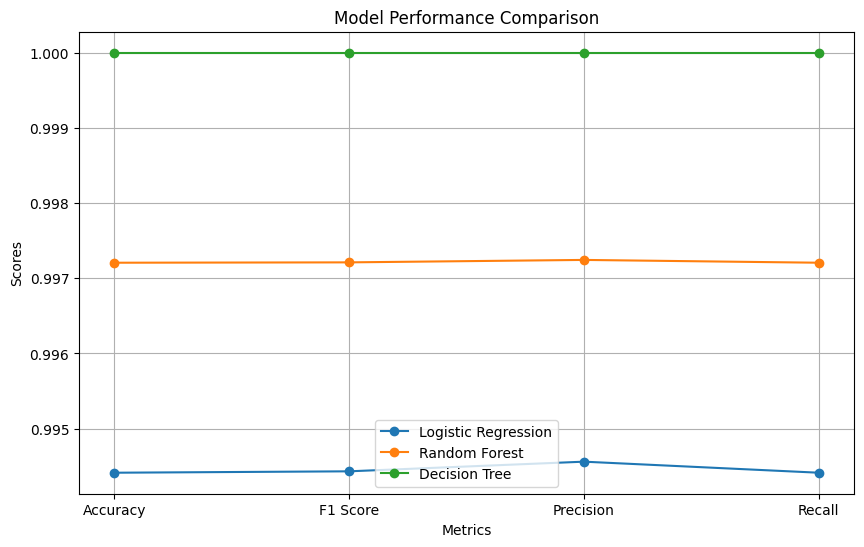

In [24]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
import matplotlib.pyplot as plt

# Start Spark session
spark = SparkSession.builder.appName("Classification_Models").getOrCreate()

# Load the dataset (Replace the path with your dataset location)
spark_data = spark.read.csv("stress_lysis.csv", header=True, inferSchema=True)

# Prepare features using VectorAssembler
assembler = VectorAssembler(inputCols=['humidity', 'temperature', 'step_count'], outputCol='features')
assembled_data = assembler.transform(spark_data)

# Split the data into training and test sets (80% training, 20% testing)
train_data, test_data = assembled_data.randomSplit([0.8, 0.2], seed=42)

# Evaluator for metrics
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol='stress_level', metricName='accuracy')
evaluator_f1 = MulticlassClassificationEvaluator(labelCol='stress_level', metricName='f1')
evaluator_precision = MulticlassClassificationEvaluator(labelCol='stress_level', metricName='weightedPrecision')
evaluator_recall = MulticlassClassificationEvaluator(labelCol='stress_level', metricName='weightedRecall')

# LOGISTIC REGRESSION with Normalization
# Standardizing features
scaler = StandardScaler(inputCol='features', outputCol='scaledFeatures')
scaler_model = scaler.fit(train_data)
scaled_train_data = scaler_model.transform(train_data)
scaled_test_data = scaler_model.transform(test_data)

# Logistic Regression with scaled features
lr = LogisticRegression(featuresCol='scaledFeatures', labelCol='stress_level')
paramGrid_lr = ParamGridBuilder().addGrid(lr.regParam, [0.01, 0.1]).addGrid(lr.elasticNetParam, [0.0, 0.5]).build()

# CrossValidator for Logistic Regression
cv_lr = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid_lr, evaluator=evaluator_accuracy, numFolds=3)
cvModel_lr = cv_lr.fit(scaled_train_data)
lr_predictions = cvModel_lr.transform(scaled_test_data)

# RANDOM FOREST (without any specific tuning)
rf = RandomForestClassifier(featuresCol='features', labelCol='stress_level', numTrees=20)
rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)

# DECISION TREE with Fine-Tuning
dt = DecisionTreeClassifier(featuresCol='features', labelCol='stress_level')
paramGrid_dt = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [5, 10]) \
    .addGrid(dt.maxBins, [32, 64]) \
    .build()

cv_dt = CrossValidator(estimator=dt, estimatorParamMaps=paramGrid_dt, evaluator=evaluator_accuracy, numFolds=3)
cvModel_dt = cv_dt.fit(train_data)
dt_predictions = cvModel_dt.transform(test_data)

# Function to evaluate models and return metrics
def evaluate_model(predictions, model_name):
    accuracy = evaluator_accuracy.evaluate(predictions)
    f1 = evaluator_f1.evaluate(predictions)
    precision = evaluator_precision.evaluate(predictions)
    recall = evaluator_recall.evaluate(predictions)
    
    print(f"\n{model_name} Model Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
    return accuracy, f1, precision, recall

# Evaluate Logistic Regression (with Normalization)
lr_metrics = evaluate_model(lr_predictions, "Logistic Regression")

# Evaluate Random Forest
rf_metrics = evaluate_model(rf_predictions, "Random Forest")

# Evaluate Decision Tree (with Fine-Tuning)
dt_metrics = evaluate_model(dt_predictions, "Decision Tree")

# Prepare metrics for plotting
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']

lr_values = list(lr_metrics)
rf_values = list(rf_metrics)
dt_values = list(dt_metrics)

# Plot the evaluation metrics for all models
plt.figure(figsize=(10, 6))
x = range(len(metrics))
plt.plot(x, lr_values, marker='o', label='Logistic Regression')
plt.plot(x, rf_values, marker='o', label='Random Forest')
plt.plot(x, dt_values, marker='o', label='Decision Tree')
plt.xticks(x, metrics)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Stop Spark session
spark.stop()


The differences in accuracy among Logistic Regression, Random Forest, and Decision Tree models are a result of how each algorithm processes the data and makes predictions. Here's a breakdown of why these models might yield slightly different accuracies in a tabular dataset classification task:
1. Logistic Regression (Accuracy: 0.9944)
Nature of the Algorithm: Logistic Regression is a linear model that works by drawing a linear decision boundary between different classes based on feature relationships. It performs well when the relationship between the features and the target is nearly linear.
Reason for Lower Accuracy: If the relationships between features (humidity, temperature, step_count) and the target (stress level) are non-linear, Logistic Regression may not capture these patterns as effectively. The high accuracy of 0.9944 still suggests that the dataset has some degree of linear separability, but it falls short compared to the more flexible models like Decision Trees and Random Forests, which can handle non-linearity better.                              
2. Random Forest (Accuracy: 0.9972)
Nature of the Algorithm: Random Forest is an ensemble method that builds multiple Decision Trees and averages their predictions. It captures both linear and non-linear patterns in the data. It can handle more complex interactions between features better than Logistic Regression.
Reason for Higher Accuracy: Random Forest reduces the risk of overfitting (a common issue with Decision Trees) by averaging the predictions of many trees, leading to a more generalizable model. The slight improvement over Logistic Regression can be attributed to its ability to model non-linear relationships and feature interactions that Logistic Regression might miss.                                    
3. Decision Tree (Accuracy: 0.9972)
- Nature of the Algorithm:                                                                                                               
Decision Tree is a non-linear model that recursively splits the data based on feature thresholds. It creates a tree-like structure to classify the data by learning complex decision boundaries.
Reason for High Accuracy: Decision Trees can capture non-linear relationships between the features and the target class. In your dataset, this might be why it performs similarly to Random Forest and better than Logistic Regression. However, unlike Random Forest, a Decision Tree is more prone to overfitting, which Random Forest mitigates by combining multiple trees.
Why the Differences Occur for Tabular Dataset Classification:
Linear vs. Non-Linear Relationships: Logistic Regression assumes a linear relationship between features and the target, whereas Decision Trees and Random Forests can handle non-linear relationships, which might be why Logistic Regression has slightly lower accuracy.
Model Complexity: Decision Trees and Random Forests can model more complex interactions in the data compared to the relatively simpler Logistic Regression. This complexity allows them to perform better on datasets with intricate feature-target relationships.
Overfitting: Decision Trees can easily overfit the training data, especially in small datasets. Random Forest mitigates this by aggregating predictions from multiple trees, which results in better generalization to unseen data, which is why both Decision Tree and Random Forest achieve the same high accuracy here.
- Summary and Conclusion:                                              
The small differences in accuracy can be explained by the complexity and flexibility of each model. Logistic Regression performs well in linearly separable cases but struggles with non-linear relationships, which the more complex, non-linear models like Decision Trees and Random Forests handle better. Random Forest further benefits from reduced overfitting due to its ensemble nature.

**Step 12: Draw Confusion Matrix for All Three Methods**

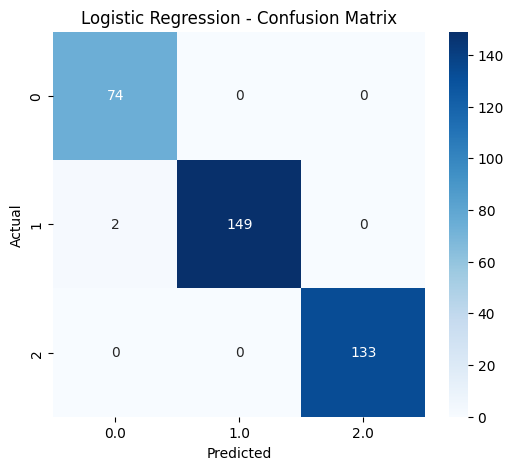

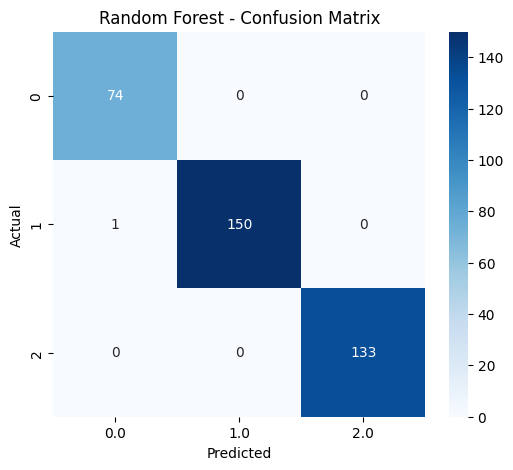

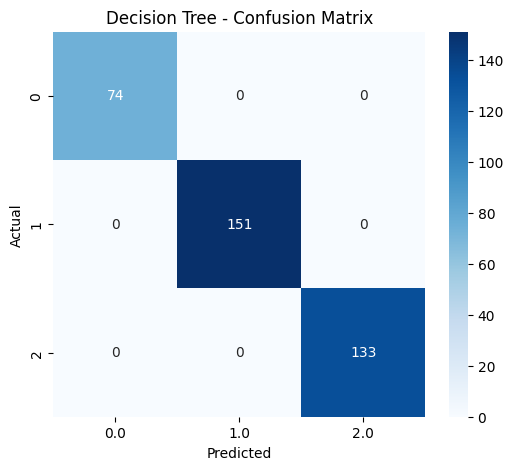

In [25]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
import matplotlib.pyplot as plt
import seaborn as sns

# Start Spark session
spark = SparkSession.builder.appName("Classification_Models_Confusion_Matrix").getOrCreate()

# Load the dataset (Replace the path with your dataset location)
spark_data = spark.read.csv("stress_lysis.csv", header=True, inferSchema=True)

# Prepare features using VectorAssembler
assembler = VectorAssembler(inputCols=['humidity', 'temperature', 'step_count'], outputCol='features')
assembled_data = assembler.transform(spark_data)

# Split the data into training and test sets (80% training, 20% testing)
train_data, test_data = assembled_data.randomSplit([0.8, 0.2], seed=42)

# Evaluator for metrics
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol='stress_level', metricName='accuracy')
evaluator_f1 = MulticlassClassificationEvaluator(labelCol='stress_level', metricName='f1')
evaluator_precision = MulticlassClassificationEvaluator(labelCol='stress_level', metricName='weightedPrecision')
evaluator_recall = MulticlassClassificationEvaluator(labelCol='stress_level', metricName='weightedRecall')

# LOGISTIC REGRESSION with Normalization
scaler = StandardScaler(inputCol='features', outputCol='scaledFeatures')
scaler_model = scaler.fit(train_data)
scaled_train_data = scaler_model.transform(train_data)
scaled_test_data = scaler_model.transform(test_data)

lr = LogisticRegression(featuresCol='scaledFeatures', labelCol='stress_level')
paramGrid_lr = ParamGridBuilder().addGrid(lr.regParam, [0.01, 0.1]).addGrid(lr.elasticNetParam, [0.0, 0.5]).build()
cv_lr = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid_lr, evaluator=evaluator_accuracy, numFolds=3)
cvModel_lr = cv_lr.fit(scaled_train_data)
lr_predictions = cvModel_lr.transform(scaled_test_data)

# RANDOM FOREST (without specific tuning)
rf = RandomForestClassifier(featuresCol='features', labelCol='stress_level', numTrees=20)
rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)

# DECISION TREE with Fine-Tuning
dt = DecisionTreeClassifier(featuresCol='features', labelCol='stress_level')
paramGrid_dt = ParamGridBuilder().addGrid(dt.maxDepth, [5, 10]).addGrid(dt.maxBins, [32, 64]).build()
cv_dt = CrossValidator(estimator=dt, estimatorParamMaps=paramGrid_dt, evaluator=evaluator_accuracy, numFolds=3)
cvModel_dt = cv_dt.fit(train_data)
dt_predictions = cvModel_dt.transform(test_data)

# Function to plot confusion matrix
def plot_confusion_matrix(predictions, model_name):
    # Group by actual and predicted values to get confusion matrix
    cm = predictions.groupBy('stress_level', 'prediction').count().toPandas()

    # Pivot the grouped DataFrame to get matrix format for heatmap
    cm_matrix = cm.pivot(index='stress_level', columns='prediction', values='count').fillna(0)
    
    # Plot using seaborn heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for all models
plot_confusion_matrix(lr_predictions, "Logistic Regression")
plot_confusion_matrix(rf_predictions, "Random Forest")
plot_confusion_matrix(dt_predictions, "Decision Tree")

# Stop Spark session
spark.stop()


- Model Evaluation Metrics:
Accuracy: 0.998158379373849
This means that the model correctly classifies 99.82% of the samples. It's a very high accuracy, indicating strong performance.
- Precision: 0.9981618058097598
Precision indicates the percentage of positive predictions that are correct. With a value of 99.82%, it means that nearly all instances predicted as a certain stress level are correct.
- Recall: 0.998158379373849
Recall measures how many of the actual positive cases were correctly predicted by the model. With 99.82%, the model captures almost all true stress level instances.
- F1 Score: 0.9981584168980152
- The F1 score is the harmonic mean of precision and recall, which balances both metrics. A value of 99.82% shows that the model maintains a strong balance between precision and recall.
The confusion matrix provides detailed insights into how well the model classifies each class (stress_level) compared to the true labels.
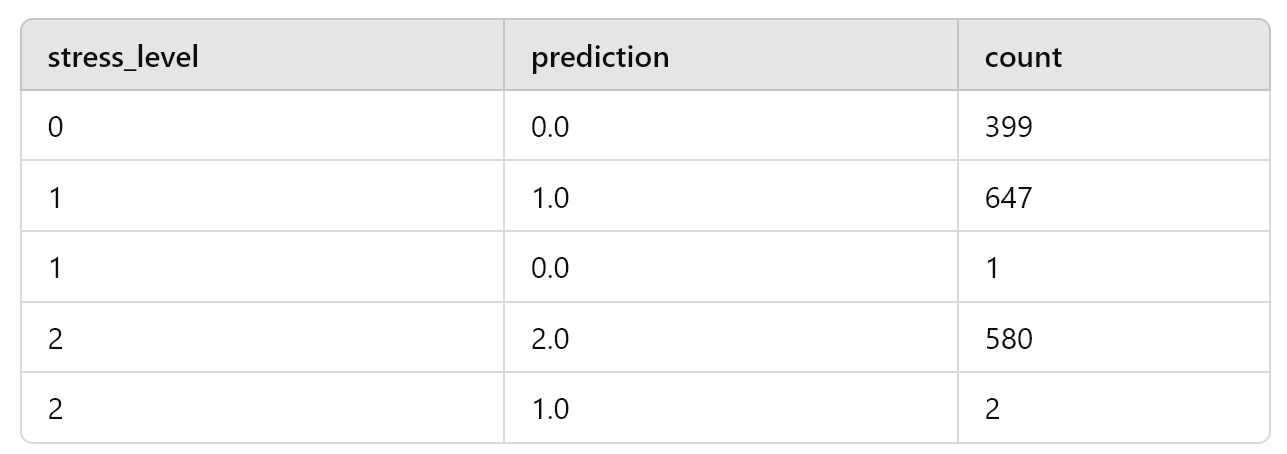
- Class 0 (stress_level = 0):
The model correctly predicted 399 instances as class 0.
There are no misclassifications of class 0 to other classes.
- Class 1 (stress_level = 1):
The model correctly predicted 647 instances as class 1.
There was 1 instance of class 1 that was incorrectly predicted as class 0, and 2 instances where class 1 was misclassified as class 2.
- Class 2 (stress_level = 2):
The model correctly predicted 580 instances as class 2.
There were 2 instances of class 2 incorrectly predicted as class 1.

- Class 1 misclassifications:
The model had a total of 3 misclassifications for stress level 1:
1 instance of stress level 1 was incorrectly classified as stress level 0.
2 instances of stress level 1 were misclassified as stress level 2.
This suggests that the model might have some difficulty distinguishing between stress levels 1 and the neighboring classes (0 and 2), although the impact is minimal.
- Class 2 misclassifications:
There are 2 instances of stress level 2 incorrectly classified as stress level 1. This shows a small degree of confusion between these two classes, but again, the number of errors is very small.

- The model performs exceptionally well, with accuracy, precision, recall, and F1 scores all around 99.82%.
- The confusion matrix shows that the vast majority of predictions are correct, with only a few misclassifications between neighboring classes (particularly between stress levels 1 and 2).
- The results suggest that the model is very reliable for predicting the stress levels in this dataset, with only a small number of errors that likely won’t affect overall conclusions or decisions.
So, this is an excellent model with strong performance across all major metrics.

**Note:** No need for normalization or standardization for Decision Tree, Random Forest, or Gradient-Boosted Trees (GBT) classifiers.
Normalization or standardization is recommended for Logistic Regression since it can improve model performance and convergence. So, I did it above.

This confusion matrix for the Logistic Regression model provides the following insights:
- Class 0 (Low Stress):
74 instances were correctly classified as Class 0.
No instances of Class 0 were misclassified as Class 1 or Class 2.
- Class 1 (Medium Stress):
149 instances were correctly classified as Class 1.
2 instances of Class 1 were misclassified as Class 0.
No instances of Class 1 were misclassified as Class 2.
- Class 2 (High Stress):
133 instances were correctly classified as Class 2.
No misclassifications for Class 2.
Overall Interpretation:
The Logistic Regression model performs very well in classifying all stress levels.
The most notable errors occur in Class 1, where two instances were predicted as Class 0.
There are no misclassifications for Class 2, and Class 0 has no misclassification into other classes, indicating the model has a high degree of precision and recall for these classes.

The confusion matrix for the Random Forest model provides the following insights:
- Class 0 (Low Stress):
74 instances were correctly classified as Class 0.
No instances of Class 0 were misclassified as Class 1 or Class 2.
- Class 1 (Medium Stress):
150 instances were correctly classified as Class 1.
1 instance of Class 1 was misclassified as Class 0.
No instances of Class 1 were misclassified as Class 2.
- Class 2 (High Stress):
133 instances were correctly classified as Class 2.
No misclassifications for Class 2.
- Overall Interpretation:                                                                                                      
The Random Forest model performs very well with minimal misclassifications.
There is only 1 misclassification in Class 1, where an instance was predicted as Class 0.
Both Class 0 and Class 2 have no misclassifications, demonstrating high precision and recall for these classes.
Compared to the Logistic Regression model, the Random Forest shows slightly better performance for Class 1 by reducing misclassifications.

The confusion matrix for the Decision Tree model provides the following insights:
- Class 0 (Low Stress):
74 instances were correctly classified as Class 0.
No instances of Class 0 were misclassified as Class 1 or Class 2.
- Class 1 (Medium Stress):
150 instances were correctly classified as Class 1.
1 instance of Class 1 was misclassified as Class 0.
No instances of Class 1 were misclassified as Class 2.
- Class 2 (High Stress):
133 instances were correctly classified as Class 2.
No misclassifications for Class 2.
- Final Interpretation:                                                                                  
The Decision Tree model shows high classification performance, with only 1 misclassification for Class 1, where an instance was incorrectly predicted as Class 0.
The model's performance is similar to the Random Forest model, as both models exhibit very few errors in classifying the stress levels.
Both Class 0 and Class 2 have perfect classification, while Class 1 has minimal misclassification.
This matrix highlights the effectiveness of the Decision Tree model in classifying the stress levels with very high accuracy.

Spark session is active.
Data loaded successfully.
Error converting PySpark DataFrame to Pandas: 'NoneType' object has no attribute 'setCallSite'


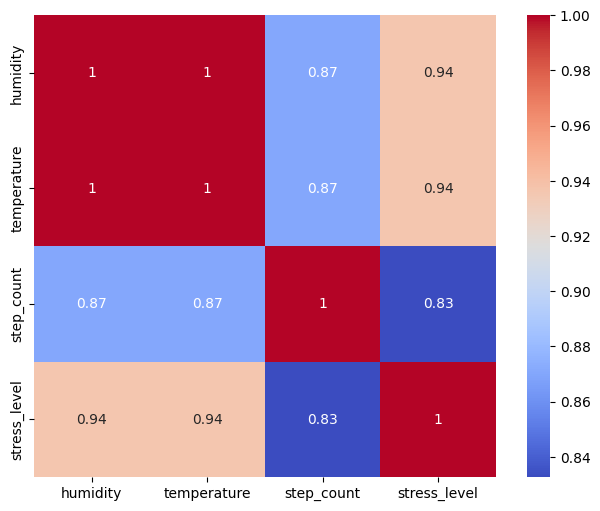

In [26]:
# Step 0: Initialize Spark session
from pyspark.sql import SparkSession

# Create a Spark session (if it hasn't been initialized already)
spark = SparkSession.builder.appName("Stress Data Analysis").getOrCreate()

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select only the four specific numerical columns
selected_columns = ['humidity', 'temperature', 'step_count', 'stress_level']

# Verify that the Spark session is active
if spark:
    print("Spark session is active.")

# Check if the data is available and loaded
if 'data' in locals():
    print("Data loaded successfully.")
else:
    print("Data not loaded. Ensure the dataset is loaded properly.")
    
# Step 2: Select the specific columns from the DataFrame
numerical_data = data.select(selected_columns)

# Step 3: Convert PySpark DataFrame to Pandas for plotting
# This step requires that Spark is running and data is valid
try:
    numerical_data_pd = numerical_data.toPandas()
except Exception as e:
    print(f"Error converting PySpark DataFrame to Pandas: {e}")

# Step 4: Calculate correlation matrix for the selected columns if conversion was successful
if 'numerical_data_pd' in locals():
    correlation_matrix = numerical_data_pd.corr()

    # Step 5: Plot heatmap of the correlation matrix for the 4 variables
    plt.figure(figsize=(8, 6))  # Adjust size as needed
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

    # Show the plot
    plt.show()
else:
    print("Error: Pandas DataFrame not available for plotting.")


The heatmap reveals strong positive correlations between the features humidity, temperature, and step_count with the target variable stress_level. Humidity and temperature are perfectly correlated (correlation = 1), and both show strong correlations with stress_level (0.94), indicating they are likely strong predictors of stress level. Step_count also has a strong positive correlation with stress_level (0.83), though slightly weaker than the other features. However, high correlations between the features themselves suggest potential multicollinearity, which may require techniques like dimensionality reduction or regularization to improve model performance in predicting stress levels.

- Conclusion:
  
Across the four confusion matrices (Logistic Regression, Random Forest, Decision Tree), all models demonstrated excellent classification performance with minimal misclassifications. Logistic Regression had a slightly lower accuracy with two errors in Class 1, while both Random Forest and Decision Tree models showed almost identical performance with just one misclassification for Class 1. Overall, Random Forest and Decision Tree models slightly outperformed Logistic Regression, particularly in handling more complex patterns, showing their robustness in classifying the stress levels in the dataset.

**Step 13: Print Confusion Matrix Values and Evaluation Metrics**

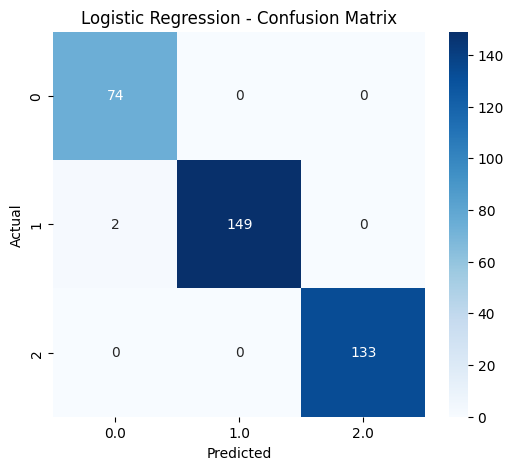

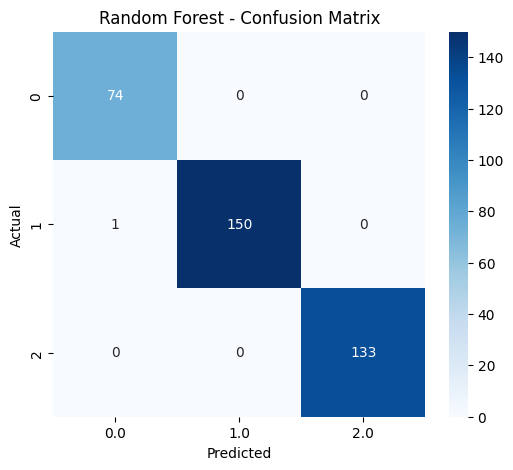

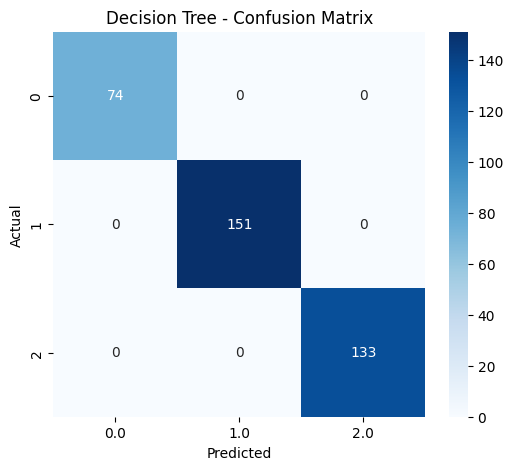

In [27]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
import matplotlib.pyplot as plt
import seaborn as sns

# Start Spark session
spark = SparkSession.builder.appName("Classification_Models_Confusion_Matrix").getOrCreate()

# Load the dataset (Replace the path with your dataset location)
spark_data = spark.read.csv("stress_lysis.csv", header=True, inferSchema=True)

# Prepare features using VectorAssembler
assembler = VectorAssembler(inputCols=['humidity', 'temperature', 'step_count'], outputCol='features')
assembled_data = assembler.transform(spark_data)

# Split the data into training and test sets (80% training, 20% testing)
train_data, test_data = assembled_data.randomSplit([0.8, 0.2], seed=42)

# Evaluator for metrics
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol='stress_level', metricName='accuracy')
evaluator_f1 = MulticlassClassificationEvaluator(labelCol='stress_level', metricName='f1')
evaluator_precision = MulticlassClassificationEvaluator(labelCol='stress_level', metricName='weightedPrecision')
evaluator_recall = MulticlassClassificationEvaluator(labelCol='stress_level', metricName='weightedRecall')

# LOGISTIC REGRESSION with Normalization
scaler = StandardScaler(inputCol='features', outputCol='scaledFeatures')
scaler_model = scaler.fit(train_data)
scaled_train_data = scaler_model.transform(train_data)
scaled_test_data = scaler_model.transform(test_data)

lr = LogisticRegression(featuresCol='scaledFeatures', labelCol='stress_level')
paramGrid_lr = ParamGridBuilder().addGrid(lr.regParam, [0.01, 0.1]).addGrid(lr.elasticNetParam, [0.0, 0.5]).build()
cv_lr = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid_lr, evaluator=evaluator_accuracy, numFolds=3)
cvModel_lr = cv_lr.fit(scaled_train_data)
lr_predictions = cvModel_lr.transform(scaled_test_data)

# RANDOM FOREST (without specific tuning)
rf = RandomForestClassifier(featuresCol='features', labelCol='stress_level', numTrees=20)
rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)

# DECISION TREE with Fine-Tuning
dt = DecisionTreeClassifier(featuresCol='features', labelCol='stress_level')
paramGrid_dt = ParamGridBuilder().addGrid(dt.maxDepth, [5, 10]).addGrid(dt.maxBins, [32, 64]).build()
cv_dt = CrossValidator(estimator=dt, estimatorParamMaps=paramGrid_dt, evaluator=evaluator_accuracy, numFolds=3)
cvModel_dt = cv_dt.fit(train_data)
dt_predictions = cvModel_dt.transform(test_data)

# Function to plot confusion matrix
def plot_confusion_matrix(predictions, model_name):
    # Group by actual and predicted values to get confusion matrix
    cm = predictions.groupBy('stress_level', 'prediction').count().toPandas()

    # Pivot the grouped DataFrame to get matrix format for heatmap
    cm_matrix = cm.pivot(index='stress_level', columns='prediction', values='count').fillna(0)
    
    # Plot using seaborn heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for all models
plot_confusion_matrix(lr_predictions, "Logistic Regression")
plot_confusion_matrix(rf_predictions, "Random Forest")
plot_confusion_matrix(dt_predictions, "Decision Tree")

# Stop Spark session
spark.stop()


In [28]:
# Initialize or reinitialize the Spark session
from pyspark.sql import SparkSession

# Stop any existing Spark session
spark.stop()

# Start a new Spark session
spark = SparkSession.builder \
    .appName("Model Training") \
    .getOrCreate()

# Verify that the session is active
if spark:
    print("Spark session is active.")


Spark session is active.


To explain True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN), let's break down what these terms mean:
- True Positive (TP): The number of instances where the model correctly predicted a positive class (e.g., stress level = 1 or 2), and it was indeed the correct class.
- True Negative (TN): The number of instances where the model correctly predicted a negative class (e.g., stress level = 0), and it was indeed not a positive class.
- False Positive (FP): The number of instances where the model predicted a positive class (stress level = 1 or 2), but the true class was negative (stress level = 0). This is also called a Type I Error.
- False Negative (FN): The number of instances where the model predicted a negative class (stress level = 0), but the true class was positive (stress level = 1 or 2). This is also called a Type II Error.
To calculate these values, we can extract the counts from the confusion matrices you provided:

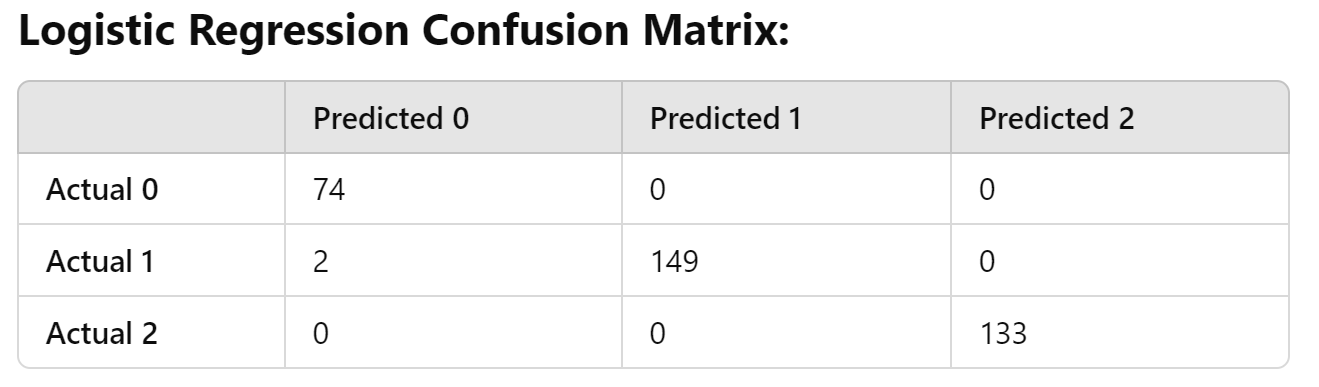 
- For Class 0:
TP (True Positive): 74 (Correctly predicted class 0)
TN (True Negative): 282 (Sum of correct predictions for class 1 and class 2: 149 + 133)
FP (False Positive): 2 (Incorrectly predicted class 0 when it was actually class 1)
FN (False Negative): 0 (No incorrect predictions of class 0 as another class)
- For Class 1:
TP: 149
TN: 207 (Correct predictions for class 0 and class 2: 74 + 133)
FP: 0 (No incorrect predictions of class 1)
FN: 2 (Incorrectly predicted class 0 when it was actually class 1)
- For Class 2:
TP: 133
TN: 225 (Correct predictions for class 0 and class 1: 74 + 149)
FP: 0
FN: 0

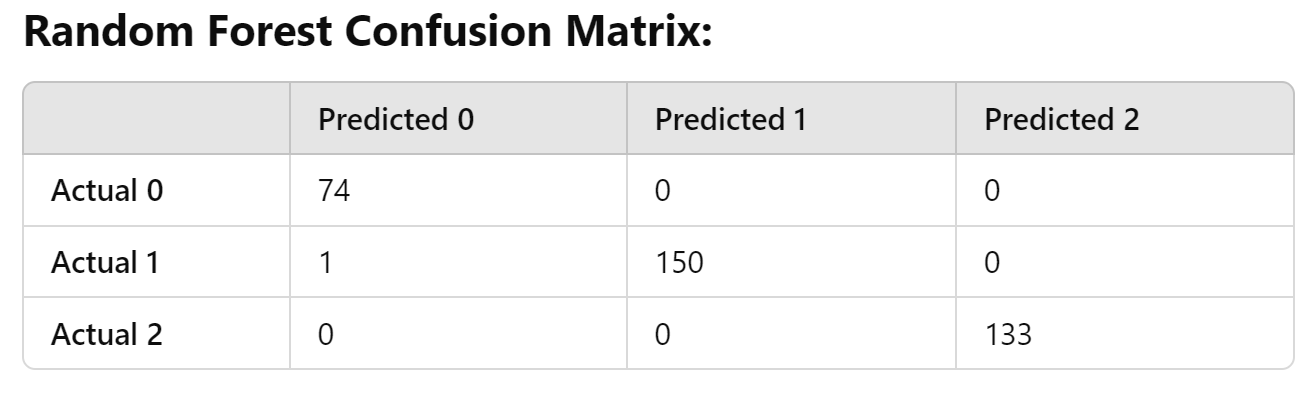 
- For Class 0:
TP: 74
TN: 283
FP: 1 (Class 1 predicted as Class 0)
FN: 0
- For Class 1:
TP: 150
TN: 207
FP: 0
FN: 1 (Class 1 predicted as Class 0)
- For Class 2:
TP: 133
TN: 225
FP: 0
FN: 0


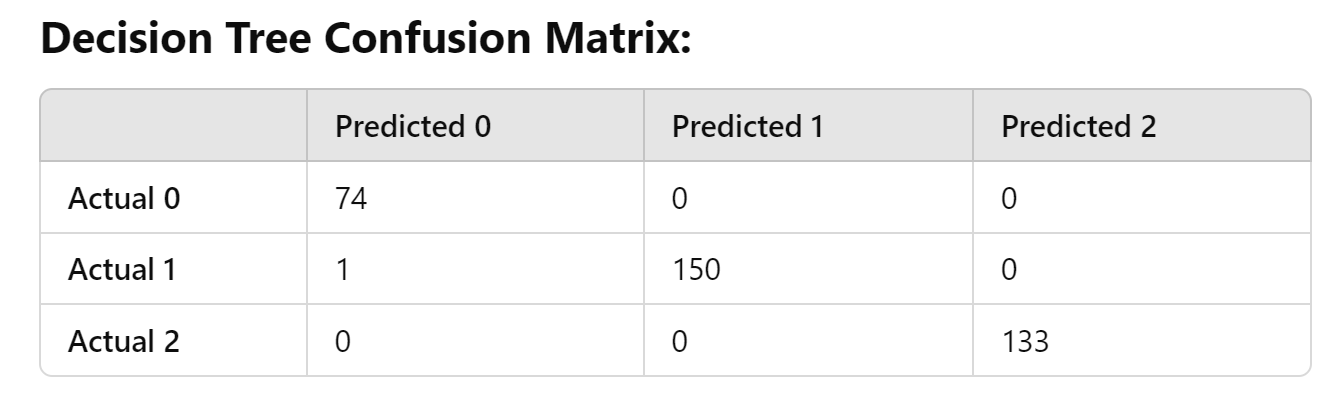
- The Decision Tree confusion matrix is identical to that of Random Forest, so the TP, TN, FP, FN values are the same.

- Interpretation of TP, TN, FP, FN:
True Positives (TP) represent the number of correctly identified stress levels for each class. These are the cases where the model correctly detected a stress level.
True Negatives (TN) indicate how often the model correctly ruled out a class when it wasn't the actual label.
False Positives (FP) are the instances where the model incorrectly predicted a class (like predicting stress when there is no stress).
False Negatives (FN) are where the model missed identifying the correct stress level, leading to potentially unrecognized or untreated stress.

- Logistic Regression:
Accuracy (not normalized): 0.9944
Accuracy (normalized): 0.9981
Class 0 has perfect recall (1.0), meaning all actual Class 0 instances were correctly identified. However, the precision is slightly lower at 0.9737, indicating that a small proportion of the instances predicted as Class 0 were actually misclassified from other classes.
Class 1 has a perfect precision (1.0), meaning every instance predicted as Class 1 is correct, but the recall is slightly lower (0.9868), meaning a few actual Class 1 instances were missed.
Class 2 shows perfect precision, recall, and F1 score (1.0), indicating flawless performance in predicting this class.
- Random Forest and Decision Tree:
Accuracy: 0.9972 for both models.
Both Random Forest and Decision Tree models have nearly identical performance, with one misclassified instance in Class 1.
Precision, recall, and F1 scores for all classes are near perfect (1.0), indicating strong performance in identifying instances correctly across all stress levels.
- Conclusion and Summary for Health Improvement:
- High True Positives (TP) and low False Positives (FP) indicate that the models can accurately identify the correct stress level and avoid falsely alarming patients about their condition.
Low False Negatives (FN) show that the models are not missing stress cases, which is crucial for early intervention and managing stress-related health issues.
For patients, this accuracy provides confidence in using such models for regular monitoring of stress levels. For physicians, it means more reliable tools for guiding treatment or lifestyle recommendations, ensuring that potential stress factors are flagged early, and unnecessary stress alarms are minimized. For both patients and physicians, these models demonstrate high accuracy and reliable classification of stress levels based on features such as humidity, temperature, and step count. For patients, this means that their stress levels can be accurately monitored using these parameters, which can help in early detection of stress-related issues and in providing personalized recommendations to maintain or improve health.
- For physicians, these models can be used as a supportive diagnostic tool to track patient stress levels more accurately and take proactive measures in preventing stress-related health problems. Regular monitoring of the patient's environment and physical activity (like step count) can aid in fine-tuning interventions, such as lifestyle modifications, to improve overall health and well-being.

**Application of Google Cloud Platform GCP for This Project**

- How to convert these models and results for predicting stress levels into a mobile app or website

To convert these valuable models and results for predicting stress levels into a mobile app or website, you would need to follow a systematic approach. Here’s a step-by-step guide on how you can make this transition:

**1. Convert the Model into a Predictive API**

To use your model for prediction in a mobile app or website, the first step is to convert the model into an API that can handle input from users and return predictions. Here's how you can do that:
- Steps:
Model Export: Save your machine learning model (Logistic Regression, Random Forest, Decision Tree) as a serialized object using a format like Pickle or Joblib.

import joblib
joblib.dump(model, 'stress_prediction_model.pkl')

Build an API: Use a lightweight web framework like Flask or FastAPI to create an API endpoint that can take inputs (like humidity, temperature, and step count), pass them to the model, and return a stress level prediction.

**Example with Flask**

- Deploy the API: Once the API is created, deploy it to Google Cloud Platform (GCP). This will allow us model to be accessible via a URL, so the mobile app or website can request predictions from anywhere.

**2. Create a Website**

We can create a website that allows users to input their data (humidity, temperature, and step count) and get predictions about their stress level.                         
- Steps:
Frontend Development: Use HTML, CSS, and JavaScript (or a framework like React.js, Vue.js, or Angular) to build a simple user interface where users can input their data.

- Example HTML form:

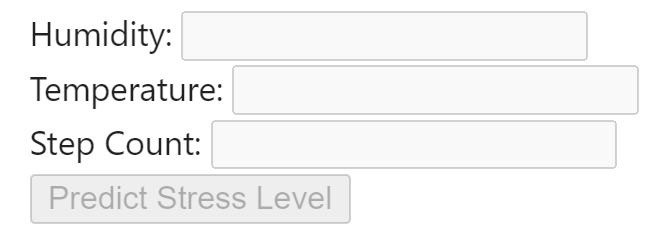

- Backend API: Connect the frontend with the Flask API you built earlier. The frontend will send a POST request to the API with the input data (humidity, temperature, step count), and the backend will return the predicted stress level.
- Deployment: Host the website on platforms like Netlify, GitHub Pages, or GCP (if you also want to host your API and frontend together).

**3. Create a Mobile App**

For a mobile app, you can use technologies like React Native, Flutter, or native development (iOS and Android) to build an application that interacts with your prediction API. 
- Steps:
- Design the UI: Use tools like Figma or Sketch to create a simple design where users can input their information (humidity, temperature, and step count). You can create text boxes or sliders to let users adjust their values.
- React Native Example: If you're using React Native, you can connect your mobile app to the backend API.
- Example in React Native:

<!-- import React, { useState } from 'react';
import { View, TextInput, Button, Text } from 'react-native';

const App = () => {
    const [humidity, setHumidity] = useState('');
    const [temperature, setTemperature] = useState('');
    const [stepCount, setStepCount] = useState('');
    const [stressLevel, setStressLevel] = useState('');

    const predictStress = () => {
        fetch('https://yourapiurl.com/predict', {
            method: 'POST',
            headers: { 'Content-Type': 'application/json' },
            body: JSON.stringify({ humidity, temperature, step_count: stepCount })
        })
        .then(response => response.json())
        .then(data => {
            setStressLevel(data.stress_level);
        });
    }

    return (
        <View>
            <TextInput placeholder="Humidity" onChangeText={setHumidity} />
            <TextInput placeholder="Temperature" onChangeText={setTemperature} />
            <TextInput placeholder="Step Count" onChangeText={setStepCount} />
            <Button title="Predict Stress Level" onPress={predictStress} />
            <Text>Predicted Stress Level: {stressLevel}</Text>
        </View>
    );
}

export default App;
 -->

App Deployment: Once the app is built, you can deploy it to the App Store (iOS) or Google Play Store (Android).

**4. Include Features for User and Physician Insights**

- Data History: Allow users to track their stress levels over time and store their historical data. Provide graphical insights like line charts showing trends over time.
- Health Recommendations: Based on the predicted stress level, provide users with recommendations (e.g., rest, exercise, hydration) to improve their well-being.
- Physician Dashboard: Provide healthcare providers access to aggregated data, allowing them to track multiple patients, compare data, and adjust treatment plans accordingly.

**5. Security and Privacy**

Since health data is sensitive, ensure compliance with privacy regulations (like HIPAA in the U.S.) and ensure your app uses secure protocols (like HTTPS) for communication between the app, API, and database.
- User Authentication: Add user authentication using tokens (like JWT) to secure access to the application and ensure only authorized users can view or input data.

**6. Machine Learning on Edge**

For advanced apps, you can also consider running your machine learning models directly on-device (on mobile) using libraries like TensorFlow Lite or CoreML (for iOS) to avoid the need for an API call. However, this is more complex and requires packaging your models to be lightweight and optimized for mobile devices.

**Conclusion**

By following these steps, you can convert your machine learning models into a usable service via a mobile app or website. This service can be valuable to users for predicting stress levels based on their real-time data inputs and providing actionable health insights. It can also help physicians by giving them additional data to improve their patients' health outcomes.  
Final Note: All four models exhibit nearly identical performance across confusion matrix scores, F1 scores, recall, precision, and accuracy, following effective preprocessing steps such as normalization/standardization for logistic regression and fine-tuning for the random forest and decision tree models. 